# Introduction to Extraordinary Optical Transmission (EOT)

Extraordinary Optical Transmission (EOT) is a fascinating phenomenon in nanophotonics where light is transmitted through subwavelength apertures in opaque metal films with efficiencies far exceeding classical predictions. Discovered in the late 1990s, EOT has opened new avenues in optics, plasmonics, and nanotechnology, enabling applications in sensing, spectroscopy, and photonic devices.

## What is EOT?

EOT refers to the enhanced transmission of light through periodic arrays of subwavelength holes or slits in metal films, such as gold or silver. According to classical aperture theory (e.g., Bethe's theory), the transmission of light through holes much smaller than the wavelength should be negligible due to diffraction limits. However, experiments have shown that when these holes are arranged in a periodic lattice, the transmission can be orders of magnitude higher than expected. This enhancement is primarily attributed to the excitation of surface plasmon polaritons (SPPs)—collective oscillations of electrons at the metal-dielectric interface—which couple incident light to the periodic structure.

## Historical Context and Significance

The phenomenon was first experimentally demonstrated by T.W. Ebbesen and colleagues in 1998, who observed anomalously high transmission through arrays of nanoholes in a metal film. This groundbreaking work, published in *Nature*, challenged conventional understanding and sparked intense research into plasmonics and metamaterials. EOT is significant because it bridges the gap between classical optics and quantum phenomena, offering insights into light-matter interactions at nanoscale dimensions.

## Applications of EOT

EOT has found applications in various fields, including:

- **Biosensing**: Highly sensitive detection of biomolecules using surface plasmon resonance.
- **Photodetectors and Filters**: Enhanced light manipulation for optical devices.
- - **Nanophotonics**: Development of subwavelength optical components.
- **Spectroscopy**: Improved signal detection in Raman and infrared spectroscopy.

This notebook will guide you through the theoretical foundations, experimental techniques, and numerical simulations of EOT, providing hands-on examples to deepen your understanding of this remarkable phenomenon.

## Reference Papers

Below are some key papers for further reading:

1. Ebbesen, T.W., Lezec, H.J., Ghaemi, H.F., Thio, T., & Wolff, P.A. (1998). "Extraordinary optical transmission through sub-wavelength hole arrays." *Nature*, 391(6668), 667-669. DOI:10.1038/35570  
   - The seminal paper that introduced EOT to the scientific community.

2. Garcia-Vidal, F.J., Martin-Moreno, L., Ebbesen, T.W., & Kuipers, L. (2010). "Light passing through subwavelength apertures." *Reviews of Modern Physics*, 82(1), 729-787. DOI:10.1103/RevModPhys.82.729  
   - A comprehensive review of the physics behind EOT and its applications.

3. Genet, C., & Ebbesen, T.W. (2007). "Light in tiny holes." *Nature*, 445(7123), 39-46. DOI:10.1038/nature05350  
   - Discusses the role of surface plasmons and the potential of EOT in nanotechnology.

4. Pendry, J.B., Martin-Moreno, L., & Garcia-Vidal, F.J. (2004). "Mimicking surface plasmons with structured surfaces." *Science*, 305(5685), 847-848. DOI:10.1126/science.1098999  
   - Explores theoretical aspects of plasmonic structures related to EOT.

These references provide a solid foundation for understanding EOT and can serve as a starting point for deeper exploration.

---

In [8]:
import meep as mp
import numpy as np
from meep.materials import Al, Ag
from meep_plot_style import *
import h5py
import os

In [9]:
# Define simulation parameters
a = 0.5           # Unit length, corresponds to 1 micron
h = 0.2    # Film thickness, 20 nm in simulation units (a = 600 nm)
r = 0.1   # Hole radius, 100 nm in simulation units
dpml = 0.5        # PML thickness
sz = 1.5          # Cell size in z-direction (non-PML region from z=-2 to z=2)
cell_size = mp.Vector3(a, a, sz)
resolution = 100  # Pixels per unit length (600 nm / 100 = 6 nm per pixel)
fcen = 1 / 0.6      # Center frequency, f = c/lambda, lambda = 600 nm = a, so f = c/a = 1
df = 1          # Frequency width for the Gaussian pulse
nfreq = 100     # Number of frequency points for the spectrum

# Define the geometry: silver film with a circular hole
geometry = [
    # Silver film as a block, infinite in x and y due to periodic boundaries
    mp.Block(
        size=mp.Vector3(mp.inf, mp.inf, h),
        center=mp.Vector3(0, 0, 0),
        material=Ag  # Predefined silver material in Meep
    ),
    # Circular hole as a cylinder of air through the film
    mp.Cylinder(
        radius=r,
        height=h,
        center=mp.Vector3(0, 0, 0),
        material=mp.Medium(epsilon=1)  # Air
    )
]

In [10]:
# Define the source: a Gaussian pulse plane wave
sources = [
    mp.Source(
        mp.GaussianSource(frequency=fcen, fwidth=df),
        component=mp.Ex,  # x-polarized electric field
        center=mp.Vector3(0, 0, -0.2),  # Positioned before the film
        size=mp.Vector3(a, a, 0)  # Spans the xy-plane of the unit cell
    )
]

boundary_layers=[mp.Absorber(thickness=dpml, direction=mp.Z)] ## !! Here, I do not use pml since pml can not deal with wave propagating parallel to the plane


In [11]:
# sim without structure
sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    boundary_layers=boundary_layers,
    sources=sources,
    k_point=mp.Vector3(0, 0, 0),
    geometry=[]
)


# Add flux monitor for  incident
flux_inci = sim.add_flux(
    fcen,
    df,
    nfreq,
    mp.FluxRegion(
        center=mp.Vector3(0, 0, 0.2),
        size=mp.Vector3(a, a, 0)
    )
)
# Run the simulation
# Run the simulation
sim.run(until_after_sources=mp.stop_when_fields_decayed(5, mp.Ex, mp.Vector3(), 1e-6))
# Get the incident flux data
incident_flux = mp.get_fluxes(flux_inci)


-----------
Initializing structure...
time for choose_chunkdivision = 5.19753e-05 s
Working in 3D dimensions.
Computational cell is 0.5 x 0.5 x 1.5 with resolution 100
time for set_epsilon = 0.54114 s
time for set_conductivity = 0.012008 s
time for set_conductivity = 0.011214 s
time for set_conductivity = 0.011256 s
time for set_conductivity = 0.012805 s
time for set_conductivity = 0.0126719 s
time for set_conductivity = 0.0124729 s
-----------
on time step 615 (time=3.075), 0.00651301 s/step
field decay(t = 5.005): 0.22967502551788954 / 0.22967502551788954 = 1.0
on time step 1249 (time=6.245), 0.00631195 s/step
on time step 1943 (time=9.715), 0.00576775 s/step
field decay(t = 10.01): 0.2504808233534304 / 0.2504808233534304 = 1.0
on time step 2582 (time=12.91), 0.00626783 s/step
field decay(t = 15.015): 4.890956457152761e-11 / 0.2504808233534304 = 1.9526271080048243e-10
run 0 finished at t = 15.015 (3003 timesteps)


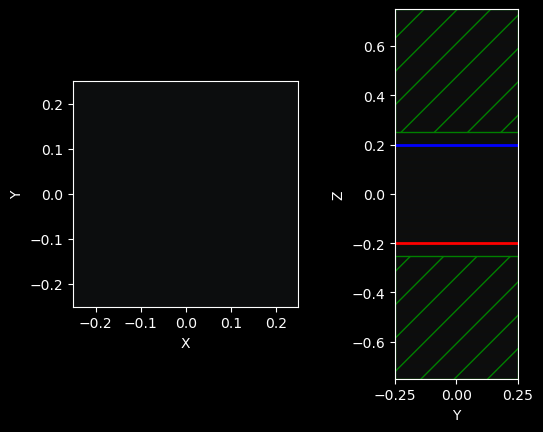

In [12]:
import matplotlib
import matplotlib.pyplot as plt
output_plane_yz = mp.Volume(
        center=mp.Vector3(0, 0, 0),  # Center of the plane
        size=mp.Vector3(0, a, sz)     # Size: full x and y, zero thickness in z
    )
output_plane_xy = mp.Volume(
        center=mp.Vector3(0, 0, 0),  # Center of the plane
        size=mp.Vector3(a, a, 0)     # Size: full x and y, zero thickness in z
    )
plt.subplot(1,2,1)
sim.plot2D(fields=mp.Ex, output_plane = output_plane_xy,eps_parameters={'cmap':cmap_alpha,'vmin':-45,'alpha':0.25}
          ,field_parameters={'cmap':cmap_br,'post_process':np.real,'vmin':-1,'vmax':1})
plt.subplot(1,2,2)
sim.plot2D(fields=mp.Ex, output_plane = output_plane_yz,eps_parameters={'cmap':'gray','vmin':-45,'alpha':0.25}
           ,field_parameters={'cmap':cmap_br,'post_process':np.real,'vmin':-1,'vmax':1})
plt.show()

In [13]:
# Step 2: Simulation with the structure to compute transmitted flux
sim.reset_meep()  # Reset the simulation

sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    boundary_layers=boundary_layers,
    sources=sources,
    k_point=mp.Vector3(0, 0, 0),
    geometry=geometry  # Include the film and hole
)

# Add flux monitor at the same position as in the empty simulation
flux_trans = sim.add_flux(
    fcen,
    df,
    nfreq,
    mp.FluxRegion(
        center=mp.Vector3(0, 0, 0.2),
        size=mp.Vector3(a, a, 0)
    )
)

# Run the simulation
sim.run(until_after_sources=mp.stop_when_fields_decayed(5, mp.Ex, mp.Vector3(), 1e-6))
# Get the transmitted flux data
transmitted_flux = mp.get_fluxes(flux_trans)


-----------
Initializing structure...
time for choose_chunkdivision = 1.40667e-05 s
Working in 3D dimensions.
Computational cell is 0.5 x 0.5 x 1.5 with resolution 100
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 1.14267 s
time for set_conductivity = 0.0271082 s
time for set_conductivity = 0.025816 s
time for set_conductivity = 0.0381911 s
time for set_conductivity = 0.0529749 s
time for set_conductivity = 0.0360041 s
time for set_conductivity = 0.0360079 s
lorentzian susceptibility: frequency=16.365, gamma=1.95106
lorentzian susceptibility: frequency=7.32593, gamma=0.738804
lorentzian susceptibility: frequency=6.60165, gamma=0.052426
lorentzian susceptibility: frequency=3.61417, gamma=0.364563
lorentzian susceptib

     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


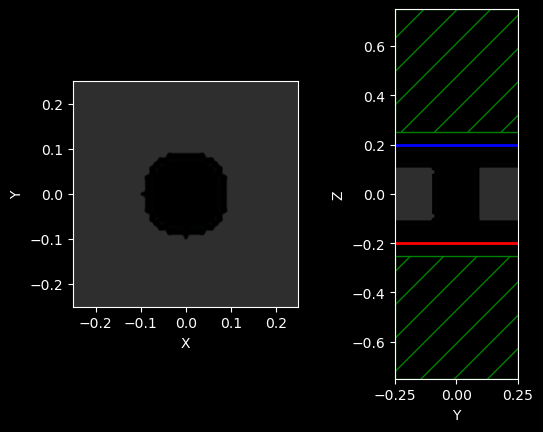

In [14]:
output_plane_yz = mp.Volume(
        center=mp.Vector3(0, 0, 0),  # Center of the plane
        size=mp.Vector3(0, a, sz)     # Size: full x and y, zero thickness in z
    )
output_plane_xy = mp.Volume(
        center=mp.Vector3(0, 0, 0),  # Center of the plane
        size=mp.Vector3(a, a, 0)     # Size: full x and y, zero thickness in z
    )
plt.subplot(1,2,1)
sim.plot2D(fields=mp.Ex,output_plane = output_plane_xy,eps_parameters={'cmap':'Greys','vmin':-5.5,'alpha':0.9}
          ,field_parameters={'cmap':cmap_br,'post_process':np.real,'vmin':-1,'vmax':1})
plt.subplot(1,2,2)
sim.plot2D(fields=mp.Ex,output_plane = output_plane_yz,eps_parameters={'cmap':'Greys','vmin':-5.5,'alpha':0.9}
           ,field_parameters={'cmap':cmap_br,'post_process':np.real,'vmin':-1,'vmax':1})
plt.show()

In [15]:

# Compute the transmission spectrum
transmission = [t / i for t, i in zip(transmitted_flux, incident_flux)]

# Extract transmission at the center frequency
flux_freqs = mp.get_flux_freqs(flux_trans)
index = np.argmin(np.abs(np.array(flux_freqs) - fcen))
transmission_at_fcen = transmission[index]

Transmission at f = 1.6666666666666667 (lambda = 600 nm): 0.03683190068235334


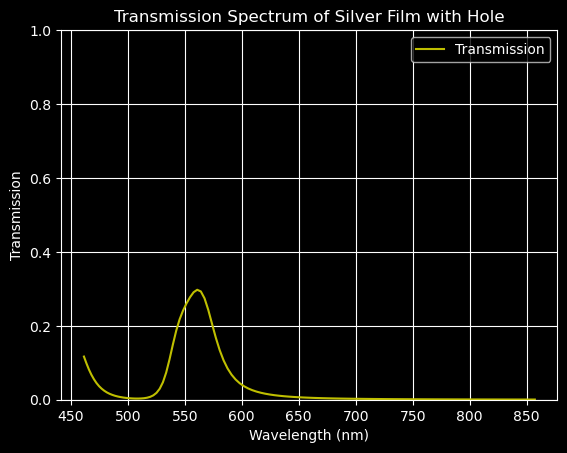

In [16]:
# Output the result
print(f"Transmission at f = {fcen} (lambda = 600 nm): {transmission_at_fcen}")

# Optional: Plot the transmission spectrum
import matplotlib.pyplot as plt
plt.plot(1000/ np.array(flux_freqs), transmission, 'y-', label='Transmission')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission')
plt.ylim([0,1])
plt.title('Transmission Spectrum of Silver Film with Hole')
plt.legend()
plt.grid(True)
plt.show()

     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
-----------
Initializing structure...
time for choose_chunkdivision = 1.5974e-05 s
Working in 3D dimensions.
Computational cell is 0.5 x 0.5 x 1.5 with resolution 100
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 1.1231 s
time for set_conductivity = 0.0238478 s
time for set_conductivity = 0.0246081 s
time for set_conductivity = 0.0228899 s
time for set_conductivity = 0.0239539 s
time for set_conductivity = 0.025804 s
time f

FloatProgress(value=0.0, description='0% done ', max=0.025)

run 0 finished at t = 0.025 (5 timesteps)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.02500000037252903, description='0% done ', max=0.05000000037252903, min=0.02500000037252…

run 1 finished at t = 0.05 (10 timesteps)
0
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.05000000074505806, description='0% done ', max=0.07500000074505805, min=0.05000000074505…

run 2 finished at t = 0.075 (15 timesteps)
1
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.07500000298023224, description='0% done ', max=0.10000000298023223, min=0.07500000298023…

run 3 finished at t = 0.105 (21 timesteps)
2
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.10499999672174454, description='0% done ', max=0.12999999672174453, min=0.10499999672174…

run 4 finished at t = 0.135 (27 timesteps)
3
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.13500000536441803, description='0% done ', max=0.16000000536441802, min=0.13500000536441…

run 5 finished at t = 0.165 (33 timesteps)
4
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.16500000655651093, description='0% done ', max=0.19000000655651092, min=0.16500000655651…

run 6 finished at t = 0.195 (39 timesteps)
5
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.19499999284744263, description='0% done ', max=0.21999999284744262, min=0.19499999284744…

run 7 finished at t = 0.22 (44 timesteps)
6
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.2199999988079071, description='0% done ', max=0.2449999988079071, min=0.2199999988079071…

run 8 finished at t = 0.245 (49 timesteps)
7
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.24500000476837158, description='0% done ', max=0.2700000047683716, min=0.245000004768371…

on time step 49 (time=0.245), 0.0834923 s/step
run 9 finished at t = 0.27 (54 timesteps)
8
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.27000001072883606, description='0% done ', max=0.2950000107288361, min=0.270000010728836…

run 10 finished at t = 0.3 (60 timesteps)
9
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.30000001192092896, description='0% done ', max=0.325000011920929, min=0.3000000119209289…

run 11 finished at t = 0.33 (66 timesteps)
10
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.33000001311302185, description='0% done ', max=0.3550000131130219, min=0.330000013113021…

run 12 finished at t = 0.36 (72 timesteps)
11
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.36000001430511475, description='0% done ', max=0.38500001430511477, min=0.36000001430511…

run 13 finished at t = 0.39 (78 timesteps)
12
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.38999998569488525, description='0% done ', max=0.4149999856948853, min=0.389999985694885…

run 14 finished at t = 0.41500000000000004 (83 timesteps)
13
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.41499999165534973, description='0% done ', max=0.43999999165534975, min=0.41499999165534…

run 15 finished at t = 0.44 (88 timesteps)
14
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.4399999976158142, description='0% done ', max=0.46499999761581423, min=0.439999997615814…

run 16 finished at t = 0.465 (93 timesteps)
15
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.4650000035762787, description='0% done ', max=0.4900000035762787, min=0.4650000035762787…

run 17 finished at t = 0.49 (98 timesteps)
16
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.49000000953674316, description='0% done ', max=0.5150000095367432, min=0.490000009536743…

run 18 finished at t = 0.52 (104 timesteps)
17
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.5199999809265137, description='0% done ', max=0.5449999809265137, min=0.5199999809265137…

on time step 104 (time=0.52), 0.0777442 s/step
run 19 finished at t = 0.545 (109 timesteps)
18
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.5450000166893005, description='0% done ', max=0.5700000166893006, min=0.5450000166893005…

run 20 finished at t = 0.5750000000000001 (115 timesteps)
19
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.574999988079071, description='0% done ', max=0.5999999880790711, min=0.574999988079071)

run 21 finished at t = 0.6 (120 timesteps)
20
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.6000000238418579, description='0% done ', max=0.6250000238418579, min=0.6000000238418579…

run 22 finished at t = 0.63 (126 timesteps)
21
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.6299999952316284, description='0% done ', max=0.6549999952316284, min=0.6299999952316284…

run 23 finished at t = 0.66 (132 timesteps)
22
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.6600000262260437, description='0% done ', max=0.6850000262260437, min=0.6600000262260437…

run 24 finished at t = 0.6900000000000001 (138 timesteps)
23
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.6899999976158142, description='0% done ', max=0.7149999976158142, min=0.6899999976158142…

run 25 finished at t = 0.72 (144 timesteps)
24
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.7200000286102295, description='0% done ', max=0.7450000286102295, min=0.7200000286102295…

run 26 finished at t = 0.75 (150 timesteps)
25
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.75, description='0% done ', max=0.775, min=0.75)

run 27 finished at t = 0.78 (156 timesteps)
26
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.7799999713897705, description='0% done ', max=0.8049999713897705, min=0.7799999713897705…

on time step 156 (time=0.78), 0.0770396 s/step
run 28 finished at t = 0.805 (161 timesteps)
27
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.8050000071525574, description='0% done ', max=0.8300000071525574, min=0.8050000071525574…

run 29 finished at t = 0.835 (167 timesteps)
28
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.8349999785423279, description='0% done ', max=0.8599999785423279, min=0.8349999785423279…

run 30 finished at t = 0.86 (172 timesteps)
29
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.8600000143051147, description='0% done ', max=0.8850000143051148, min=0.8600000143051147…

run 31 finished at t = 0.89 (178 timesteps)
30
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.8899999856948853, description='0% done ', max=0.9149999856948853, min=0.8899999856948853…

run 32 finished at t = 0.915 (183 timesteps)
31
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.9150000214576721, description='0% done ', max=0.9400000214576721, min=0.9150000214576721…

run 33 finished at t = 0.9450000000000001 (189 timesteps)
32
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.9449999928474426, description='0% done ', max=0.9699999928474426, min=0.9449999928474426…

run 34 finished at t = 0.97 (194 timesteps)
33
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=0.9700000286102295, description='0% done ', max=0.9950000286102295, min=0.9700000286102295…

run 35 finished at t = 1.0 (200 timesteps)
34
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.0, description='0% done ', max=1.025, min=1.0)

run 36 finished at t = 1.03 (206 timesteps)
35
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.0299999713897705, description='0% done ', max=1.0549999713897704, min=1.0299999713897705…

run 37 finished at t = 1.06 (212 timesteps)
36
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.059999942779541, description='0% done ', max=1.084999942779541, min=1.059999942779541)

on time step 212 (time=1.06), 0.0758893 s/step
run 38 finished at t = 1.085 (217 timesteps)
37
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.0850000381469727, description='0% done ', max=1.1100000381469726, min=1.0850000381469727…

run 39 finished at t = 1.115 (223 timesteps)
38
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.1150000095367432, description='0% done ', max=1.140000009536743, min=1.1150000095367432)

run 40 finished at t = 1.145 (229 timesteps)
39
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.1449999809265137, description='0% done ', max=1.1699999809265136, min=1.1449999809265137…

run 41 finished at t = 1.175 (235 timesteps)
40
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.1749999523162842, description='0% done ', max=1.199999952316284, min=1.1749999523162842)

run 42 finished at t = 1.2 (240 timesteps)
41
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.2000000476837158, description='0% done ', max=1.2250000476837157, min=1.2000000476837158…

run 43 finished at t = 1.23 (246 timesteps)
42
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.2300000190734863, description='0% done ', max=1.2550000190734862, min=1.2300000190734863…

run 44 finished at t = 1.26 (252 timesteps)
43
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.2599999904632568, description='0% done ', max=1.2849999904632567, min=1.2599999904632568…

run 45 finished at t = 1.29 (258 timesteps)
44
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.2899999618530273, description='0% done ', max=1.3149999618530273, min=1.2899999618530273…

run 46 finished at t = 1.315 (263 timesteps)
45
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.315000057220459, description='0% done ', max=1.340000057220459, min=1.315000057220459)

on time step 263 (time=1.315), 0.0790012 s/step
run 47 finished at t = 1.345 (269 timesteps)
46
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.3450000286102295, description='0% done ', max=1.3700000286102294, min=1.3450000286102295…

run 48 finished at t = 1.375 (275 timesteps)
47
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.375, description='0% done ', max=1.4, min=1.375)

run 49 finished at t = 1.405 (281 timesteps)
48
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.4049999713897705, description='0% done ', max=1.4299999713897704, min=1.4049999713897705…

run 50 finished at t = 1.435 (287 timesteps)
49
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.434999942779541, description='0% done ', max=1.459999942779541, min=1.434999942779541)

run 51 finished at t = 1.46 (292 timesteps)
50
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.4600000381469727, description='0% done ', max=1.4850000381469726, min=1.4600000381469727…

run 52 finished at t = 1.49 (298 timesteps)
51
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.4900000095367432, description='0% done ', max=1.515000009536743, min=1.4900000095367432)

run 53 finished at t = 1.52 (304 timesteps)
52
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.5199999809265137, description='0% done ', max=1.5449999809265136, min=1.5199999809265137…

run 54 finished at t = 1.55 (310 timesteps)
53
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.5499999523162842, description='0% done ', max=1.574999952316284, min=1.5499999523162842)

run 55 finished at t = 1.575 (315 timesteps)
54
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.5750000476837158, description='0% done ', max=1.6000000476837157, min=1.5750000476837158…

run 56 finished at t = 1.605 (321 timesteps)
55
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.6050000190734863, description='0% done ', max=1.6300000190734862, min=1.6050000190734863…

on time step 321 (time=1.605), 0.0740499 s/step
run 57 finished at t = 1.635 (327 timesteps)
56
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.6349999904632568, description='0% done ', max=1.6599999904632567, min=1.6349999904632568…

run 58 finished at t = 1.665 (333 timesteps)
57
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.6649999618530273, description='0% done ', max=1.6899999618530273, min=1.6649999618530273…

run 59 finished at t = 1.69 (338 timesteps)
58
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.690000057220459, description='0% done ', max=1.715000057220459, min=1.690000057220459)

run 60 finished at t = 1.72 (344 timesteps)
59
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.7200000286102295, description='0% done ', max=1.7450000286102294, min=1.7200000286102295…

run 61 finished at t = 1.75 (350 timesteps)
60
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.75, description='0% done ', max=1.775, min=1.75)

run 62 finished at t = 1.78 (356 timesteps)
61
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.7799999713897705, description='0% done ', max=1.8049999713897704, min=1.7799999713897705…

run 63 finished at t = 1.81 (362 timesteps)
62
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.809999942779541, description='0% done ', max=1.834999942779541, min=1.809999942779541)

run 64 finished at t = 1.835 (367 timesteps)
63
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.8350000381469727, description='0% done ', max=1.8600000381469726, min=1.8350000381469727…

run 65 finished at t = 1.865 (373 timesteps)
64
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.8650000095367432, description='0% done ', max=1.890000009536743, min=1.8650000095367432)

run 66 finished at t = 1.895 (379 timesteps)
65
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.8949999809265137, description='0% done ', max=1.9199999809265136, min=1.8949999809265137…

on time step 379 (time=1.895), 0.0707882 s/step
run 67 finished at t = 1.925 (385 timesteps)
66
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.9249999523162842, description='0% done ', max=1.949999952316284, min=1.9249999523162842)

run 68 finished at t = 1.95 (390 timesteps)
67
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.9500000476837158, description='0% done ', max=1.9750000476837157, min=1.9500000476837158…

run 69 finished at t = 1.98 (396 timesteps)
68
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=1.9800000190734863, description='0% done ', max=2.0050000190734862, min=1.9800000190734863…

run 70 finished at t = 2.005 (401 timesteps)
69
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.005000114440918, description='0% done ', max=2.030000114440918, min=2.005000114440918)

run 71 finished at t = 2.035 (407 timesteps)
70
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.0350000858306885, description='0% done ', max=2.0600000858306884, min=2.0350000858306885…

run 72 finished at t = 2.065 (413 timesteps)
71
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.065000057220459, description='0% done ', max=2.090000057220459, min=2.065000057220459)

run 73 finished at t = 2.095 (419 timesteps)
72
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.0950000286102295, description='0% done ', max=2.1200000286102294, min=2.0950000286102295…

run 74 finished at t = 2.125 (425 timesteps)
73
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.125, description='0% done ', max=2.15, min=2.125)

run 75 finished at t = 2.15 (430 timesteps)
74
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.1500000953674316, description='0% done ', max=2.1750000953674316, min=2.1500000953674316…

on time step 430 (time=2.15), 0.0802191 s/step
run 76 finished at t = 2.18 (436 timesteps)
75
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.180000066757202, description='0% done ', max=2.205000066757202, min=2.180000066757202)

run 77 finished at t = 2.21 (442 timesteps)
76
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.2100000381469727, description='0% done ', max=2.2350000381469726, min=2.2100000381469727…

run 78 finished at t = 2.24 (448 timesteps)
77
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.240000009536743, description='0% done ', max=2.265000009536743, min=2.240000009536743)

run 79 finished at t = 2.265 (453 timesteps)
78
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.265000104904175, description='0% done ', max=2.2900001049041747, min=2.265000104904175)

run 80 finished at t = 2.295 (459 timesteps)
79
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.2950000762939453, description='0% done ', max=2.3200000762939452, min=2.2950000762939453…

run 81 finished at t = 2.325 (465 timesteps)
80
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.325000047683716, description='0% done ', max=2.3500000476837157, min=2.325000047683716)

run 82 finished at t = 2.355 (471 timesteps)
81
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.3550000190734863, description='0% done ', max=2.3800000190734862, min=2.3550000190734863…

run 83 finished at t = 2.38 (476 timesteps)
82
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.380000114440918, description='0% done ', max=2.405000114440918, min=2.380000114440918)

run 84 finished at t = 2.41 (482 timesteps)
83
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.4100000858306885, description='0% done ', max=2.4350000858306884, min=2.4100000858306885…

on time step 487 (time=2.435), 0.0703114 s/step
run 85 finished at t = 2.44 (488 timesteps)
84
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.440000057220459, description='0% done ', max=2.465000057220459, min=2.440000057220459)

run 86 finished at t = 2.47 (494 timesteps)
85
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.4700000286102295, description='0% done ', max=2.4950000286102294, min=2.4700000286102295…

run 87 finished at t = 2.5 (500 timesteps)
86
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.5, description='0% done ', max=2.525, min=2.5)

run 88 finished at t = 2.525 (505 timesteps)
87
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.5250000953674316, description='0% done ', max=2.5500000953674316, min=2.5250000953674316…

run 89 finished at t = 2.555 (511 timesteps)
88
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.555000066757202, description='0% done ', max=2.580000066757202, min=2.555000066757202)

run 90 finished at t = 2.585 (517 timesteps)
89
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.5850000381469727, description='0% done ', max=2.6100000381469726, min=2.5850000381469727…

run 91 finished at t = 2.615 (523 timesteps)
90
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.615000009536743, description='0% done ', max=2.640000009536743, min=2.615000009536743)

run 92 finished at t = 2.64 (528 timesteps)
91
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.640000104904175, description='0% done ', max=2.6650001049041747, min=2.640000104904175)

run 93 finished at t = 2.67 (534 timesteps)
92
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.6700000762939453, description='0% done ', max=2.6950000762939452, min=2.6700000762939453…

run 94 finished at t = 2.7 (540 timesteps)
93
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.700000047683716, description='0% done ', max=2.7250000476837157, min=2.700000047683716)

on time step 540 (time=2.7), 0.0791503 s/step
run 95 finished at t = 2.73 (546 timesteps)
94
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.7300000190734863, description='0% done ', max=2.7550000190734862, min=2.7300000190734863…

run 96 finished at t = 2.755 (551 timesteps)
95
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.755000114440918, description='0% done ', max=2.780000114440918, min=2.755000114440918)

run 97 finished at t = 2.785 (557 timesteps)
96
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.7850000858306885, description='0% done ', max=2.8100000858306884, min=2.7850000858306885…

run 98 finished at t = 2.815 (563 timesteps)
97
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.815000057220459, description='0% done ', max=2.840000057220459, min=2.815000057220459)

run 99 finished at t = 2.845 (569 timesteps)
98
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.8450000286102295, description='0% done ', max=2.8700000286102294, min=2.8450000286102295…

run 100 finished at t = 2.875 (575 timesteps)
99
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.875, description='0% done ', max=2.9, min=2.875)

run 101 finished at t = 2.9 (580 timesteps)
100
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.9000000953674316, description='0% done ', max=2.9250000953674316, min=2.9000000953674316…

run 102 finished at t = 2.93 (586 timesteps)
101
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.930000066757202, description='0% done ', max=2.955000066757202, min=2.930000066757202)

run 103 finished at t = 2.96 (592 timesteps)
102
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.9600000381469727, description='0% done ', max=2.9850000381469726, min=2.9600000381469727…

on time step 597 (time=2.985), 0.0703253 s/step
run 104 finished at t = 2.99 (598 timesteps)
103
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=2.990000009536743, description='0% done ', max=3.015000009536743, min=2.990000009536743)

run 105 finished at t = 3.015 (603 timesteps)
104
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.015000104904175, description='0% done ', max=3.0400001049041747, min=3.015000104904175)

run 106 finished at t = 3.045 (609 timesteps)
105
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.0450000762939453, description='0% done ', max=3.0700000762939452, min=3.0450000762939453…

run 107 finished at t = 3.075 (615 timesteps)
106
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.075000047683716, description='0% done ', max=3.1000000476837157, min=3.075000047683716)

run 108 finished at t = 3.105 (621 timesteps)
107
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.1050000190734863, description='0% done ', max=3.1300000190734862, min=3.1050000190734863…

run 109 finished at t = 3.13 (626 timesteps)
108
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.130000114440918, description='0% done ', max=3.155000114440918, min=3.130000114440918)

run 110 finished at t = 3.16 (632 timesteps)
109
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.1600000858306885, description='0% done ', max=3.1850000858306884, min=3.1600000858306885…

run 111 finished at t = 3.19 (638 timesteps)
110
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.190000057220459, description='0% done ', max=3.215000057220459, min=3.190000057220459)

run 112 finished at t = 3.22 (644 timesteps)
111
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.2200000286102295, description='0% done ', max=3.2450000286102294, min=3.2200000286102295…

on time step 648 (time=3.24), 0.0785433 s/step
run 113 finished at t = 3.25 (650 timesteps)
112
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.25, description='0% done ', max=3.275, min=3.25)

run 114 finished at t = 3.275 (655 timesteps)
113
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.2750000953674316, description='0% done ', max=3.3000000953674316, min=3.2750000953674316…

run 115 finished at t = 3.305 (661 timesteps)
114
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.305000066757202, description='0% done ', max=3.330000066757202, min=3.305000066757202)

run 116 finished at t = 3.335 (667 timesteps)
115
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.3350000381469727, description='0% done ', max=3.3600000381469726, min=3.3350000381469727…

run 117 finished at t = 3.365 (673 timesteps)
116
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.365000009536743, description='0% done ', max=3.390000009536743, min=3.365000009536743)

run 118 finished at t = 3.39 (678 timesteps)
117
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.390000104904175, description='0% done ', max=3.4150001049041747, min=3.390000104904175)

run 119 finished at t = 3.42 (684 timesteps)
118
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.4200000762939453, description='0% done ', max=3.4450000762939452, min=3.4200000762939453…

run 120 finished at t = 3.45 (690 timesteps)
119
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.450000047683716, description='0% done ', max=3.4750000476837157, min=3.450000047683716)

run 121 finished at t = 3.48 (696 timesteps)
120
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.4800000190734863, description='0% done ', max=3.5050000190734862, min=3.4800000190734863…

run 122 finished at t = 3.505 (701 timesteps)
121
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.505000114440918, description='0% done ', max=3.530000114440918, min=3.505000114440918)

on time step 701 (time=3.505), 0.0803819 s/step
run 123 finished at t = 3.535 (707 timesteps)
122
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.5350000858306885, description='0% done ', max=3.5600000858306884, min=3.5350000858306885…

run 124 finished at t = 3.565 (713 timesteps)
123
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.565000057220459, description='0% done ', max=3.590000057220459, min=3.565000057220459)

run 125 finished at t = 3.595 (719 timesteps)
124
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.5950000286102295, description='0% done ', max=3.6200000286102294, min=3.5950000286102295…

run 126 finished at t = 3.625 (725 timesteps)
125
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.625, description='0% done ', max=3.65, min=3.625)

run 127 finished at t = 3.65 (730 timesteps)
126
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.6500000953674316, description='0% done ', max=3.6750000953674316, min=3.6500000953674316…

run 128 finished at t = 3.68 (736 timesteps)
127
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.680000066757202, description='0% done ', max=3.705000066757202, min=3.680000066757202)

run 129 finished at t = 3.71 (742 timesteps)
128
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.7100000381469727, description='0% done ', max=3.7350000381469726, min=3.7100000381469727…

run 130 finished at t = 3.74 (748 timesteps)
129
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.740000009536743, description='0% done ', max=3.765000009536743, min=3.740000009536743)

run 131 finished at t = 3.765 (753 timesteps)
130
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.765000104904175, description='0% done ', max=3.7900001049041747, min=3.765000104904175)

on time step 756 (time=3.78), 0.0730387 s/step
run 132 finished at t = 3.795 (759 timesteps)
131
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.7950000762939453, description='0% done ', max=3.8200000762939452, min=3.7950000762939453…

run 133 finished at t = 3.825 (765 timesteps)
132
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.825000047683716, description='0% done ', max=3.8500000476837157, min=3.825000047683716)

run 134 finished at t = 3.855 (771 timesteps)
133
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.8550000190734863, description='0% done ', max=3.8800000190734862, min=3.8550000190734863…

run 135 finished at t = 3.88 (776 timesteps)
134
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.880000114440918, description='0% done ', max=3.905000114440918, min=3.880000114440918)

run 136 finished at t = 3.91 (782 timesteps)
135
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.9100000858306885, description='0% done ', max=3.9350000858306884, min=3.9100000858306885…

run 137 finished at t = 3.94 (788 timesteps)
136
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.940000057220459, description='0% done ', max=3.965000057220459, min=3.940000057220459)

run 138 finished at t = 3.97 (794 timesteps)
137
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=3.9700000286102295, description='0% done ', max=3.9950000286102294, min=3.9700000286102295…

run 139 finished at t = 4.0 (800 timesteps)
138
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.0, description='0% done ', max=4.025, min=4.0)

run 140 finished at t = 4.025 (805 timesteps)
139
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.025000095367432, description='0% done ', max=4.050000095367432, min=4.025000095367432)

run 141 finished at t = 4.05 (810 timesteps)
140
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.050000190734863, description='0% done ', max=4.075000190734864, min=4.050000190734863)

on time step 810 (time=4.05), 0.0781543 s/step
run 142 finished at t = 4.08 (816 timesteps)
141
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.079999923706055, description='0% done ', max=4.104999923706055, min=4.079999923706055)

run 143 finished at t = 4.105 (821 timesteps)
142
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.105000019073486, description='0% done ', max=4.130000019073487, min=4.105000019073486)

run 144 finished at t = 4.13 (826 timesteps)
143
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.130000114440918, description='0% done ', max=4.155000114440918, min=4.130000114440918)

run 145 finished at t = 4.155 (831 timesteps)
144
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.15500020980835, description='0% done ', max=4.18000020980835, min=4.15500020980835)

run 146 finished at t = 4.1850000000000005 (837 timesteps)
145
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.184999942779541, description='0% done ', max=4.209999942779541, min=4.184999942779541)

run 147 finished at t = 4.21 (842 timesteps)
146
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.210000038146973, description='0% done ', max=4.235000038146973, min=4.210000038146973)

run 148 finished at t = 4.235 (847 timesteps)
147
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.235000133514404, description='0% done ', max=4.260000133514405, min=4.235000133514404)

run 149 finished at t = 4.26 (852 timesteps)
148
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.260000228881836, description='0% done ', max=4.285000228881836, min=4.260000228881836)

run 150 finished at t = 4.29 (858 timesteps)
149
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.289999961853027, description='0% done ', max=4.314999961853028, min=4.289999961853027)

run 151 finished at t = 4.315 (863 timesteps)
150
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.315000057220459, description='0% done ', max=4.340000057220459, min=4.315000057220459)

on time step 863 (time=4.315), 0.0802766 s/step
run 152 finished at t = 4.34 (868 timesteps)
151
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.340000152587891, description='0% done ', max=4.365000152587891, min=4.340000152587891)

run 153 finished at t = 4.37 (874 timesteps)
152
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.369999885559082, description='0% done ', max=4.394999885559082, min=4.369999885559082)

run 154 finished at t = 4.3950000000000005 (879 timesteps)
153
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.394999980926514, description='0% done ', max=4.419999980926514, min=4.394999980926514)

run 155 finished at t = 4.42 (884 timesteps)
154
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.420000076293945, description='0% done ', max=4.445000076293946, min=4.420000076293945)

run 156 finished at t = 4.445 (889 timesteps)
155
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.445000171661377, description='0% done ', max=4.470000171661377, min=4.445000171661377)

run 157 finished at t = 4.4750000000000005 (895 timesteps)
156
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.474999904632568, description='0% done ', max=4.499999904632569, min=4.474999904632568)

run 158 finished at t = 4.5 (900 timesteps)
157
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.5, description='0% done ', max=4.525, min=4.5)

run 159 finished at t = 4.525 (905 timesteps)
158
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.525000095367432, description='0% done ', max=4.550000095367432, min=4.525000095367432)

run 160 finished at t = 4.55 (910 timesteps)
159
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.550000190734863, description='0% done ', max=4.575000190734864, min=4.550000190734863)

run 161 finished at t = 4.58 (916 timesteps)
160
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.579999923706055, description='0% done ', max=4.604999923706055, min=4.579999923706055)

on time step 916 (time=4.58), 0.0786897 s/step
run 162 finished at t = 4.605 (921 timesteps)
161
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.605000019073486, description='0% done ', max=4.630000019073487, min=4.605000019073486)

run 163 finished at t = 4.63 (926 timesteps)
162
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.630000114440918, description='0% done ', max=4.655000114440918, min=4.630000114440918)

run 164 finished at t = 4.655 (931 timesteps)
163
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.65500020980835, description='0% done ', max=4.68000020980835, min=4.65500020980835)

run 165 finished at t = 4.6850000000000005 (937 timesteps)
164
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.684999942779541, description='0% done ', max=4.709999942779541, min=4.684999942779541)

run 166 finished at t = 4.71 (942 timesteps)
165
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.710000038146973, description='0% done ', max=4.735000038146973, min=4.710000038146973)

run 167 finished at t = 4.735 (947 timesteps)
166
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.735000133514404, description='0% done ', max=4.760000133514405, min=4.735000133514404)

run 168 finished at t = 4.76 (952 timesteps)
167
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.760000228881836, description='0% done ', max=4.785000228881836, min=4.760000228881836)

run 169 finished at t = 4.79 (958 timesteps)
168
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.789999961853027, description='0% done ', max=4.814999961853028, min=4.789999961853027)

run 170 finished at t = 4.815 (963 timesteps)
169
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.815000057220459, description='0% done ', max=4.840000057220459, min=4.815000057220459)

on time step 967 (time=4.835), 0.078951 s/step
run 171 finished at t = 4.84 (968 timesteps)
170
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.840000152587891, description='0% done ', max=4.865000152587891, min=4.840000152587891)

run 172 finished at t = 4.87 (974 timesteps)
171
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.869999885559082, description='0% done ', max=4.894999885559082, min=4.869999885559082)

run 173 finished at t = 4.8950000000000005 (979 timesteps)
172
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.894999980926514, description='0% done ', max=4.919999980926514, min=4.894999980926514)

run 174 finished at t = 4.92 (984 timesteps)
173
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.920000076293945, description='0% done ', max=4.945000076293946, min=4.920000076293945)

run 175 finished at t = 4.945 (989 timesteps)
174
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.945000171661377, description='0% done ', max=4.970000171661377, min=4.945000171661377)

run 176 finished at t = 4.9750000000000005 (995 timesteps)
175
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=4.974999904632568, description='0% done ', max=4.999999904632569, min=4.974999904632568)

run 177 finished at t = 5.0 (1000 timesteps)
176
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.0, description='0% done ', max=5.025, min=5.0)

run 178 finished at t = 5.025 (1005 timesteps)
177
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.025000095367432, description='0% done ', max=5.050000095367432, min=5.025000095367432)

run 179 finished at t = 5.05 (1010 timesteps)
178
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.050000190734863, description='0% done ', max=5.075000190734864, min=5.050000190734863)

run 180 finished at t = 5.08 (1016 timesteps)
179
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.079999923706055, description='0% done ', max=5.104999923706055, min=5.079999923706055)

on time step 1016 (time=5.08), 0.0830203 s/step
run 181 finished at t = 5.105 (1021 timesteps)
180
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.105000019073486, description='0% done ', max=5.130000019073487, min=5.105000019073486)

run 182 finished at t = 5.13 (1026 timesteps)
181
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.130000114440918, description='0% done ', max=5.155000114440918, min=5.130000114440918)

run 183 finished at t = 5.155 (1031 timesteps)
182
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.15500020980835, description='0% done ', max=5.18000020980835, min=5.15500020980835)

run 184 finished at t = 5.1850000000000005 (1037 timesteps)
183
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.184999942779541, description='0% done ', max=5.209999942779541, min=5.184999942779541)

run 185 finished at t = 5.21 (1042 timesteps)
184
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.210000038146973, description='0% done ', max=5.235000038146973, min=5.210000038146973)

run 186 finished at t = 5.235 (1047 timesteps)
185
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.235000133514404, description='0% done ', max=5.260000133514405, min=5.235000133514404)

run 187 finished at t = 5.26 (1052 timesteps)
186
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.260000228881836, description='0% done ', max=5.285000228881836, min=5.260000228881836)

run 188 finished at t = 5.29 (1058 timesteps)
187
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.289999961853027, description='0% done ', max=5.314999961853028, min=5.289999961853027)

run 189 finished at t = 5.315 (1063 timesteps)
188
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.315000057220459, description='0% done ', max=5.340000057220459, min=5.315000057220459)

on time step 1063 (time=5.315), 0.0853744 s/step
run 190 finished at t = 5.34 (1068 timesteps)
189
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.340000152587891, description='0% done ', max=5.365000152587891, min=5.340000152587891)

run 191 finished at t = 5.37 (1074 timesteps)
190
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.369999885559082, description='0% done ', max=5.394999885559082, min=5.369999885559082)

run 192 finished at t = 5.3950000000000005 (1079 timesteps)
191
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.394999980926514, description='0% done ', max=5.419999980926514, min=5.394999980926514)

run 193 finished at t = 5.42 (1084 timesteps)
192
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.420000076293945, description='0% done ', max=5.445000076293946, min=5.420000076293945)

run 194 finished at t = 5.445 (1089 timesteps)
193
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.445000171661377, description='0% done ', max=5.470000171661377, min=5.445000171661377)

run 195 finished at t = 5.4750000000000005 (1095 timesteps)
194
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.474999904632568, description='0% done ', max=5.499999904632569, min=5.474999904632568)

run 196 finished at t = 5.5 (1100 timesteps)
195
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.5, description='0% done ', max=5.525, min=5.5)

run 197 finished at t = 5.525 (1105 timesteps)
196
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.525000095367432, description='0% done ', max=5.550000095367432, min=5.525000095367432)

run 198 finished at t = 5.55 (1110 timesteps)
197
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.550000190734863, description='0% done ', max=5.575000190734864, min=5.550000190734863)

on time step 1110 (time=5.55), 0.0854613 s/step
run 199 finished at t = 5.58 (1116 timesteps)
198
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.579999923706055, description='0% done ', max=5.604999923706055, min=5.579999923706055)

run 200 finished at t = 5.605 (1121 timesteps)
199
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.605000019073486, description='0% done ', max=5.630000019073487, min=5.605000019073486)

run 201 finished at t = 5.63 (1126 timesteps)
200
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.630000114440918, description='0% done ', max=5.655000114440918, min=5.630000114440918)

run 202 finished at t = 5.655 (1131 timesteps)
201
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.65500020980835, description='0% done ', max=5.68000020980835, min=5.65500020980835)

run 203 finished at t = 5.6850000000000005 (1137 timesteps)
202
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.684999942779541, description='0% done ', max=5.709999942779541, min=5.684999942779541)

run 204 finished at t = 5.71 (1142 timesteps)
203
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.710000038146973, description='0% done ', max=5.735000038146973, min=5.710000038146973)

run 205 finished at t = 5.735 (1147 timesteps)
204
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.735000133514404, description='0% done ', max=5.760000133514405, min=5.735000133514404)

run 206 finished at t = 5.76 (1152 timesteps)
205
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.760000228881836, description='0% done ', max=5.785000228881836, min=5.760000228881836)

run 207 finished at t = 5.79 (1158 timesteps)
206
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.789999961853027, description='0% done ', max=5.814999961853028, min=5.789999961853027)

on time step 1158 (time=5.79), 0.0865843 s/step
run 208 finished at t = 5.815 (1163 timesteps)
207
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.815000057220459, description='0% done ', max=5.840000057220459, min=5.815000057220459)

run 209 finished at t = 5.84 (1168 timesteps)
208
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.840000152587891, description='0% done ', max=5.865000152587891, min=5.840000152587891)

run 210 finished at t = 5.87 (1174 timesteps)
209
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.869999885559082, description='0% done ', max=5.894999885559082, min=5.869999885559082)

run 211 finished at t = 5.8950000000000005 (1179 timesteps)
210
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.894999980926514, description='0% done ', max=5.919999980926514, min=5.894999980926514)

run 212 finished at t = 5.92 (1184 timesteps)
211
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.920000076293945, description='0% done ', max=5.945000076293946, min=5.920000076293945)

run 213 finished at t = 5.945 (1189 timesteps)
212
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.945000171661377, description='0% done ', max=5.970000171661377, min=5.945000171661377)

run 214 finished at t = 5.9750000000000005 (1195 timesteps)
213
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=5.974999904632568, description='0% done ', max=5.999999904632569, min=5.974999904632568)

run 215 finished at t = 6.0 (1200 timesteps)
214
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.0, description='0% done ', max=6.025, min=6.0)

run 216 finished at t = 6.025 (1205 timesteps)
215
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.025000095367432, description='0% done ', max=6.050000095367432, min=6.025000095367432)

on time step 1205 (time=6.025), 0.0873794 s/step
run 217 finished at t = 6.05 (1210 timesteps)
216
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.050000190734863, description='0% done ', max=6.075000190734864, min=6.050000190734863)

run 218 finished at t = 6.08 (1216 timesteps)
217
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.079999923706055, description='0% done ', max=6.104999923706055, min=6.079999923706055)

run 219 finished at t = 6.105 (1221 timesteps)
218
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.105000019073486, description='0% done ', max=6.130000019073487, min=6.105000019073486)

run 220 finished at t = 6.13 (1226 timesteps)
219
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.130000114440918, description='0% done ', max=6.155000114440918, min=6.130000114440918)

run 221 finished at t = 6.155 (1231 timesteps)
220
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.15500020980835, description='0% done ', max=6.18000020980835, min=6.15500020980835)

run 222 finished at t = 6.1850000000000005 (1237 timesteps)
221
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.184999942779541, description='0% done ', max=6.209999942779541, min=6.184999942779541)

run 223 finished at t = 6.21 (1242 timesteps)
222
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.210000038146973, description='0% done ', max=6.235000038146973, min=6.210000038146973)

run 224 finished at t = 6.235 (1247 timesteps)
223
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.235000133514404, description='0% done ', max=6.260000133514405, min=6.235000133514404)

run 225 finished at t = 6.26 (1252 timesteps)
224
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.260000228881836, description='0% done ', max=6.285000228881836, min=6.260000228881836)

on time step 1252 (time=6.26), 0.0902622 s/step
run 226 finished at t = 6.29 (1258 timesteps)
225
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.289999961853027, description='0% done ', max=6.314999961853028, min=6.289999961853027)

run 227 finished at t = 6.315 (1263 timesteps)
226
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.315000057220459, description='0% done ', max=6.340000057220459, min=6.315000057220459)

run 228 finished at t = 6.34 (1268 timesteps)
227
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.340000152587891, description='0% done ', max=6.365000152587891, min=6.340000152587891)

run 229 finished at t = 6.37 (1274 timesteps)
228
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.369999885559082, description='0% done ', max=6.394999885559082, min=6.369999885559082)

run 230 finished at t = 6.3950000000000005 (1279 timesteps)
229
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.394999980926514, description='0% done ', max=6.419999980926514, min=6.394999980926514)

run 231 finished at t = 6.42 (1284 timesteps)
230
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.420000076293945, description='0% done ', max=6.445000076293946, min=6.420000076293945)

run 232 finished at t = 6.445 (1289 timesteps)
231
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.445000171661377, description='0% done ', max=6.470000171661377, min=6.445000171661377)

run 233 finished at t = 6.4750000000000005 (1295 timesteps)
232
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.474999904632568, description='0% done ', max=6.499999904632569, min=6.474999904632568)

run 234 finished at t = 6.5 (1300 timesteps)
233
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.5, description='0% done ', max=6.525, min=6.5)

on time step 1300 (time=6.5), 0.0863196 s/step
run 235 finished at t = 6.525 (1305 timesteps)
234
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.525000095367432, description='0% done ', max=6.550000095367432, min=6.525000095367432)

run 236 finished at t = 6.55 (1310 timesteps)
235
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.550000190734863, description='0% done ', max=6.575000190734864, min=6.550000190734863)

run 237 finished at t = 6.58 (1316 timesteps)
236
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.579999923706055, description='0% done ', max=6.604999923706055, min=6.579999923706055)

run 238 finished at t = 6.605 (1321 timesteps)
237
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.605000019073486, description='0% done ', max=6.630000019073487, min=6.605000019073486)

run 239 finished at t = 6.63 (1326 timesteps)
238
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.630000114440918, description='0% done ', max=6.655000114440918, min=6.630000114440918)

run 240 finished at t = 6.655 (1331 timesteps)
239
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.65500020980835, description='0% done ', max=6.68000020980835, min=6.65500020980835)

run 241 finished at t = 6.6850000000000005 (1337 timesteps)
240
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.684999942779541, description='0% done ', max=6.709999942779541, min=6.684999942779541)

run 242 finished at t = 6.71 (1342 timesteps)
241
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.710000038146973, description='0% done ', max=6.735000038146973, min=6.710000038146973)

run 243 finished at t = 6.735 (1347 timesteps)
242
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.735000133514404, description='0% done ', max=6.760000133514405, min=6.735000133514404)

run 244 finished at t = 6.76 (1352 timesteps)
243
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.760000228881836, description='0% done ', max=6.785000228881836, min=6.760000228881836)

on time step 1352 (time=6.76), 0.0818012 s/step
run 245 finished at t = 6.79 (1358 timesteps)
244
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.789999961853027, description='0% done ', max=6.814999961853028, min=6.789999961853027)

run 246 finished at t = 6.815 (1363 timesteps)
245
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.815000057220459, description='0% done ', max=6.840000057220459, min=6.815000057220459)

run 247 finished at t = 6.84 (1368 timesteps)
246
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.840000152587891, description='0% done ', max=6.865000152587891, min=6.840000152587891)

run 248 finished at t = 6.87 (1374 timesteps)
247
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.869999885559082, description='0% done ', max=6.894999885559082, min=6.869999885559082)

run 249 finished at t = 6.8950000000000005 (1379 timesteps)
248
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.894999980926514, description='0% done ', max=6.919999980926514, min=6.894999980926514)

run 250 finished at t = 6.92 (1384 timesteps)
249
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.920000076293945, description='0% done ', max=6.945000076293946, min=6.920000076293945)

run 251 finished at t = 6.945 (1389 timesteps)
250
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.945000171661377, description='0% done ', max=6.970000171661377, min=6.945000171661377)

run 252 finished at t = 6.9750000000000005 (1395 timesteps)
251
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=6.974999904632568, description='0% done ', max=6.999999904632569, min=6.974999904632568)

run 253 finished at t = 7.0 (1400 timesteps)
252
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.0, description='0% done ', max=7.025, min=7.0)

on time step 1400 (time=7), 0.084955 s/step
run 254 finished at t = 7.025 (1405 timesteps)
253
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.025000095367432, description='0% done ', max=7.050000095367432, min=7.025000095367432)

run 255 finished at t = 7.05 (1410 timesteps)
254
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.050000190734863, description='0% done ', max=7.075000190734864, min=7.050000190734863)

run 256 finished at t = 7.08 (1416 timesteps)
255
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.079999923706055, description='0% done ', max=7.104999923706055, min=7.079999923706055)

run 257 finished at t = 7.105 (1421 timesteps)
256
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.105000019073486, description='0% done ', max=7.130000019073487, min=7.105000019073486)

run 258 finished at t = 7.13 (1426 timesteps)
257
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.130000114440918, description='0% done ', max=7.155000114440918, min=7.130000114440918)

run 259 finished at t = 7.155 (1431 timesteps)
258
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.15500020980835, description='0% done ', max=7.18000020980835, min=7.15500020980835)

run 260 finished at t = 7.1850000000000005 (1437 timesteps)
259
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.184999942779541, description='0% done ', max=7.209999942779541, min=7.184999942779541)

run 261 finished at t = 7.21 (1442 timesteps)
260
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.210000038146973, description='0% done ', max=7.235000038146973, min=7.210000038146973)

run 262 finished at t = 7.235 (1447 timesteps)
261
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.235000133514404, description='0% done ', max=7.260000133514405, min=7.235000133514404)

on time step 1451 (time=7.255), 0.0786354 s/step
run 263 finished at t = 7.26 (1452 timesteps)
262
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.260000228881836, description='0% done ', max=7.285000228881836, min=7.260000228881836)

run 264 finished at t = 7.29 (1458 timesteps)
263
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.289999961853027, description='0% done ', max=7.314999961853028, min=7.289999961853027)

run 265 finished at t = 7.315 (1463 timesteps)
264
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.315000057220459, description='0% done ', max=7.340000057220459, min=7.315000057220459)

run 266 finished at t = 7.34 (1468 timesteps)
265
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.340000152587891, description='0% done ', max=7.365000152587891, min=7.340000152587891)

run 267 finished at t = 7.37 (1474 timesteps)
266
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.369999885559082, description='0% done ', max=7.394999885559082, min=7.369999885559082)

run 268 finished at t = 7.3950000000000005 (1479 timesteps)
267
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.394999980926514, description='0% done ', max=7.419999980926514, min=7.394999980926514)

run 269 finished at t = 7.42 (1484 timesteps)
268
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.420000076293945, description='0% done ', max=7.445000076293946, min=7.420000076293945)

run 270 finished at t = 7.445 (1489 timesteps)
269
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.445000171661377, description='0% done ', max=7.470000171661377, min=7.445000171661377)

run 271 finished at t = 7.4750000000000005 (1495 timesteps)
270
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.474999904632568, description='0% done ', max=7.499999904632569, min=7.474999904632568)

run 272 finished at t = 7.5 (1500 timesteps)
271
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.5, description='0% done ', max=7.525, min=7.5)

on time step 1500 (time=7.5), 0.0875554 s/step
run 273 finished at t = 7.525 (1505 timesteps)
272
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.525000095367432, description='0% done ', max=7.550000095367432, min=7.525000095367432)

run 274 finished at t = 7.55 (1510 timesteps)
273
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.550000190734863, description='0% done ', max=7.575000190734864, min=7.550000190734863)

run 275 finished at t = 7.58 (1516 timesteps)
274
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.579999923706055, description='0% done ', max=7.604999923706055, min=7.579999923706055)

run 276 finished at t = 7.605 (1521 timesteps)
275
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.605000019073486, description='0% done ', max=7.630000019073487, min=7.605000019073486)

run 277 finished at t = 7.63 (1526 timesteps)
276
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.630000114440918, description='0% done ', max=7.655000114440918, min=7.630000114440918)

run 278 finished at t = 7.655 (1531 timesteps)
277
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.65500020980835, description='0% done ', max=7.68000020980835, min=7.65500020980835)

run 279 finished at t = 7.6850000000000005 (1537 timesteps)
278
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.684999942779541, description='0% done ', max=7.709999942779541, min=7.684999942779541)

run 280 finished at t = 7.71 (1542 timesteps)
279
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.710000038146973, description='0% done ', max=7.735000038146973, min=7.710000038146973)

run 281 finished at t = 7.735 (1547 timesteps)
280
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.735000133514404, description='0% done ', max=7.760000133514405, min=7.735000133514404)

on time step 1547 (time=7.735), 0.0880059 s/step
run 282 finished at t = 7.76 (1552 timesteps)
281
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.760000228881836, description='0% done ', max=7.785000228881836, min=7.760000228881836)

run 283 finished at t = 7.79 (1558 timesteps)
282
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.789999961853027, description='0% done ', max=7.814999961853028, min=7.789999961853027)

run 284 finished at t = 7.815 (1563 timesteps)
283
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.815000057220459, description='0% done ', max=7.840000057220459, min=7.815000057220459)

run 285 finished at t = 7.84 (1568 timesteps)
284
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.840000152587891, description='0% done ', max=7.865000152587891, min=7.840000152587891)

run 286 finished at t = 7.87 (1574 timesteps)
285
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.869999885559082, description='0% done ', max=7.894999885559082, min=7.869999885559082)

run 287 finished at t = 7.8950000000000005 (1579 timesteps)
286
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.894999980926514, description='0% done ', max=7.919999980926514, min=7.894999980926514)

run 288 finished at t = 7.92 (1584 timesteps)
287
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.920000076293945, description='0% done ', max=7.945000076293946, min=7.920000076293945)

run 289 finished at t = 7.945 (1589 timesteps)
288
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.945000171661377, description='0% done ', max=7.970000171661377, min=7.945000171661377)

run 290 finished at t = 7.9750000000000005 (1595 timesteps)
289
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=7.974999904632568, description='0% done ', max=7.999999904632569, min=7.974999904632568)

on time step 1595 (time=7.975), 0.0870799 s/step
run 291 finished at t = 8.0 (1600 timesteps)
290
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.0, description='0% done ', max=8.025, min=8.0)

run 292 finished at t = 8.03 (1606 timesteps)
291
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.029999732971191, description='0% done ', max=8.054999732971192, min=8.029999732971191)

run 293 finished at t = 8.055 (1611 timesteps)
292
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.055000305175781, description='0% done ', max=8.080000305175782, min=8.055000305175781)

run 294 finished at t = 8.085 (1617 timesteps)
293
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.085000038146973, description='0% done ', max=8.110000038146973, min=8.085000038146973)

run 295 finished at t = 8.115 (1623 timesteps)
294
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.114999771118164, description='0% done ', max=8.139999771118164, min=8.114999771118164)

run 296 finished at t = 8.14 (1628 timesteps)
295
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.140000343322754, description='0% done ', max=8.165000343322754, min=8.140000343322754)

run 297 finished at t = 8.17 (1634 timesteps)
296
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.170000076293945, description='0% done ', max=8.195000076293946, min=8.170000076293945)

run 298 finished at t = 8.2 (1640 timesteps)
297
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.199999809265137, description='0% done ', max=8.224999809265137, min=8.199999809265137)

run 299 finished at t = 8.225 (1645 timesteps)
298
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.225000381469727, description='0% done ', max=8.250000381469727, min=8.225000381469727)

on time step 1645 (time=8.225), 0.0851597 s/step
run 300 finished at t = 8.255 (1651 timesteps)
299
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.255000114440918, description='0% done ', max=8.280000114440918, min=8.255000114440918)

run 301 finished at t = 8.285 (1657 timesteps)
300
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.28499984741211, description='0% done ', max=8.30999984741211, min=8.28499984741211)

run 302 finished at t = 8.31 (1662 timesteps)
301
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.3100004196167, description='0% done ', max=8.3350004196167, min=8.3100004196167)

run 303 finished at t = 8.34 (1668 timesteps)
302
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.34000015258789, description='0% done ', max=8.365000152587891, min=8.34000015258789)

run 304 finished at t = 8.370000000000001 (1674 timesteps)
303
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.369999885559082, description='0% done ', max=8.394999885559082, min=8.369999885559082)

run 305 finished at t = 8.395 (1679 timesteps)
304
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.395000457763672, description='0% done ', max=8.420000457763672, min=8.395000457763672)

run 306 finished at t = 8.425 (1685 timesteps)
305
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.425000190734863, description='0% done ', max=8.450000190734864, min=8.425000190734863)

run 307 finished at t = 8.455 (1691 timesteps)
306
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.454999923706055, description='0% done ', max=8.479999923706055, min=8.454999923706055)

on time step 1691 (time=8.455), 0.088953 s/step
run 308 finished at t = 8.485 (1697 timesteps)
307
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.484999656677246, description='0% done ', max=8.509999656677246, min=8.484999656677246)

run 309 finished at t = 8.51 (1702 timesteps)
308
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.510000228881836, description='0% done ', max=8.535000228881836, min=8.510000228881836)

run 310 finished at t = 8.540000000000001 (1708 timesteps)
309
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.539999961853027, description='0% done ', max=8.564999961853028, min=8.539999961853027)

run 311 finished at t = 8.57 (1714 timesteps)
310
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.569999694824219, description='0% done ', max=8.594999694824219, min=8.569999694824219)

run 312 finished at t = 8.595 (1719 timesteps)
311
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.595000267028809, description='0% done ', max=8.620000267028809, min=8.595000267028809)

run 313 finished at t = 8.625 (1725 timesteps)
312
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.625, description='0% done ', max=8.65, min=8.625)

run 314 finished at t = 8.655 (1731 timesteps)
313
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.654999732971191, description='0% done ', max=8.679999732971192, min=8.654999732971191)

run 315 finished at t = 8.68 (1736 timesteps)
314
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.680000305175781, description='0% done ', max=8.705000305175782, min=8.680000305175781)

on time step 1736 (time=8.68), 0.0933977 s/step
run 316 finished at t = 8.71 (1742 timesteps)
315
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.710000038146973, description='0% done ', max=8.735000038146973, min=8.710000038146973)

run 317 finished at t = 8.74 (1748 timesteps)
316
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.739999771118164, description='0% done ', max=8.764999771118164, min=8.739999771118164)

run 318 finished at t = 8.765 (1753 timesteps)
317
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.765000343322754, description='0% done ', max=8.790000343322754, min=8.765000343322754)

run 319 finished at t = 8.795 (1759 timesteps)
318
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.795000076293945, description='0% done ', max=8.820000076293946, min=8.795000076293945)

run 320 finished at t = 8.825000000000001 (1765 timesteps)
319
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.824999809265137, description='0% done ', max=8.849999809265137, min=8.824999809265137)

run 321 finished at t = 8.85 (1770 timesteps)
320
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.850000381469727, description='0% done ', max=8.875000381469727, min=8.850000381469727)

run 322 finished at t = 8.88 (1776 timesteps)
321
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.880000114440918, description='0% done ', max=8.905000114440918, min=8.880000114440918)

run 323 finished at t = 8.91 (1782 timesteps)
322
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.90999984741211, description='0% done ', max=8.93499984741211, min=8.90999984741211)

on time step 1782 (time=8.91), 0.0873805 s/step
run 324 finished at t = 8.935 (1787 timesteps)
323
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.9350004196167, description='0% done ', max=8.9600004196167, min=8.9350004196167)

run 325 finished at t = 8.965 (1793 timesteps)
324
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.96500015258789, description='0% done ', max=8.990000152587891, min=8.96500015258789)

run 326 finished at t = 8.995000000000001 (1799 timesteps)
325
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=8.994999885559082, description='0% done ', max=9.019999885559082, min=8.994999885559082)

run 327 finished at t = 9.02 (1804 timesteps)
326
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.020000457763672, description='0% done ', max=9.045000457763672, min=9.020000457763672)

run 328 finished at t = 9.05 (1810 timesteps)
327
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.050000190734863, description='0% done ', max=9.075000190734864, min=9.050000190734863)

run 329 finished at t = 9.08 (1816 timesteps)
328
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.079999923706055, description='0% done ', max=9.104999923706055, min=9.079999923706055)

run 330 finished at t = 9.11 (1822 timesteps)
329
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.109999656677246, description='0% done ', max=9.134999656677246, min=9.109999656677246)

on time step 1822 (time=9.11), 0.112928 s/step
run 331 finished at t = 9.135 (1827 timesteps)
330
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.135000228881836, description='0% done ', max=9.160000228881836, min=9.135000228881836)

run 332 finished at t = 9.165000000000001 (1833 timesteps)
331
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.164999961853027, description='0% done ', max=9.189999961853028, min=9.164999961853027)

run 333 finished at t = 9.195 (1839 timesteps)
332
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.194999694824219, description='0% done ', max=9.219999694824219, min=9.194999694824219)

run 334 finished at t = 9.22 (1844 timesteps)
333
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.220000267028809, description='0% done ', max=9.245000267028809, min=9.220000267028809)

run 335 finished at t = 9.25 (1850 timesteps)
334
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.25, description='0% done ', max=9.275, min=9.25)

run 336 finished at t = 9.28 (1856 timesteps)
335
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.279999732971191, description='0% done ', max=9.304999732971192, min=9.279999732971191)

run 337 finished at t = 9.305 (1861 timesteps)
336
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.305000305175781, description='0% done ', max=9.330000305175782, min=9.305000305175781)

on time step 1862 (time=9.31), 0.100242 s/step
run 338 finished at t = 9.335 (1867 timesteps)
337
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.335000038146973, description='0% done ', max=9.360000038146973, min=9.335000038146973)

run 339 finished at t = 9.365 (1873 timesteps)
338
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.364999771118164, description='0% done ', max=9.389999771118164, min=9.364999771118164)

run 340 finished at t = 9.39 (1878 timesteps)
339
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.390000343322754, description='0% done ', max=9.415000343322754, min=9.390000343322754)

run 341 finished at t = 9.42 (1884 timesteps)
340
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.420000076293945, description='0% done ', max=9.445000076293946, min=9.420000076293945)

run 342 finished at t = 9.450000000000001 (1890 timesteps)
341
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.449999809265137, description='0% done ', max=9.474999809265137, min=9.449999809265137)

run 343 finished at t = 9.475 (1895 timesteps)
342
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.475000381469727, description='0% done ', max=9.500000381469727, min=9.475000381469727)

run 344 finished at t = 9.505 (1901 timesteps)
343
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.505000114440918, description='0% done ', max=9.530000114440918, min=9.505000114440918)

on time step 1901 (time=9.505), 0.112121 s/step
run 345 finished at t = 9.535 (1907 timesteps)
344
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.53499984741211, description='0% done ', max=9.55999984741211, min=9.53499984741211)

run 346 finished at t = 9.56 (1912 timesteps)
345
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.5600004196167, description='0% done ', max=9.5850004196167, min=9.5600004196167)

run 347 finished at t = 9.59 (1918 timesteps)
346
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.59000015258789, description='0% done ', max=9.615000152587891, min=9.59000015258789)

run 348 finished at t = 9.620000000000001 (1924 timesteps)
347
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.619999885559082, description='0% done ', max=9.644999885559082, min=9.619999885559082)

run 349 finished at t = 9.645 (1929 timesteps)
348
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.645000457763672, description='0% done ', max=9.670000457763672, min=9.645000457763672)

run 350 finished at t = 9.675 (1935 timesteps)
349
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.675000190734863, description='0% done ', max=9.700000190734864, min=9.675000190734863)

run 351 finished at t = 9.705 (1941 timesteps)
350
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.704999923706055, description='0% done ', max=9.729999923706055, min=9.704999923706055)

on time step 1941 (time=9.705), 0.105713 s/step
run 352 finished at t = 9.735 (1947 timesteps)
351
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.734999656677246, description='0% done ', max=9.759999656677246, min=9.734999656677246)

run 353 finished at t = 9.76 (1952 timesteps)
352
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.760000228881836, description='0% done ', max=9.785000228881836, min=9.760000228881836)

run 354 finished at t = 9.790000000000001 (1958 timesteps)
353
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.789999961853027, description='0% done ', max=9.814999961853028, min=9.789999961853027)

run 355 finished at t = 9.82 (1964 timesteps)
354
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.819999694824219, description='0% done ', max=9.844999694824219, min=9.819999694824219)

run 356 finished at t = 9.845 (1969 timesteps)
355
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.845000267028809, description='0% done ', max=9.870000267028809, min=9.845000267028809)

run 357 finished at t = 9.875 (1975 timesteps)
356
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.875, description='0% done ', max=9.9, min=9.875)

run 358 finished at t = 9.905 (1981 timesteps)
357
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.904999732971191, description='0% done ', max=9.929999732971192, min=9.904999732971191)

on time step 1981 (time=9.905), 0.10401 s/step
run 359 finished at t = 9.93 (1986 timesteps)
358
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.930000305175781, description='0% done ', max=9.955000305175782, min=9.930000305175781)

run 360 finished at t = 9.96 (1992 timesteps)
359
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.960000038146973, description='0% done ', max=9.985000038146973, min=9.960000038146973)

run 361 finished at t = 9.99 (1998 timesteps)
360
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=9.989999771118164, description='0% done ', max=10.014999771118164, min=9.989999771118164)

run 362 finished at t = 10.015 (2003 timesteps)
361
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.015000343322754, description='0% done ', max=10.040000343322754, min=10.015000343322754…

run 363 finished at t = 10.045 (2009 timesteps)
362
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.045000076293945, description='0% done ', max=10.070000076293946, min=10.045000076293945…

run 364 finished at t = 10.075000000000001 (2015 timesteps)
363
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.074999809265137, description='0% done ', max=10.099999809265137, min=10.074999809265137…

on time step 2015 (time=10.075), 0.122703 s/step
run 365 finished at t = 10.1 (2020 timesteps)
364
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.100000381469727, description='0% done ', max=10.125000381469727, min=10.100000381469727…

run 366 finished at t = 10.13 (2026 timesteps)
365
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.130000114440918, description='0% done ', max=10.155000114440918, min=10.130000114440918…

run 367 finished at t = 10.16 (2032 timesteps)
366
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.15999984741211, description='0% done ', max=10.18499984741211, min=10.15999984741211)

run 368 finished at t = 10.185 (2037 timesteps)
367
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.1850004196167, description='0% done ', max=10.2100004196167, min=10.1850004196167)

run 369 finished at t = 10.215 (2043 timesteps)
368
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.21500015258789, description='0% done ', max=10.240000152587891, min=10.21500015258789)

run 370 finished at t = 10.245000000000001 (2049 timesteps)
369
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.244999885559082, description='0% done ', max=10.269999885559082, min=10.244999885559082…

on time step 2049 (time=10.245), 0.130451 s/step
run 371 finished at t = 10.27 (2054 timesteps)
370
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.270000457763672, description='0% done ', max=10.295000457763672, min=10.270000457763672…

run 372 finished at t = 10.3 (2060 timesteps)
371
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.300000190734863, description='0% done ', max=10.325000190734864, min=10.300000190734863…

run 373 finished at t = 10.33 (2066 timesteps)
372
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.329999923706055, description='0% done ', max=10.354999923706055, min=10.329999923706055…

run 374 finished at t = 10.36 (2072 timesteps)
373
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.359999656677246, description='0% done ', max=10.384999656677246, min=10.359999656677246…

run 375 finished at t = 10.385 (2077 timesteps)
374
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.385000228881836, description='0% done ', max=10.410000228881836, min=10.385000228881836…

run 376 finished at t = 10.415000000000001 (2083 timesteps)
375
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.414999961853027, description='0% done ', max=10.439999961853028, min=10.414999961853027…

run 377 finished at t = 10.445 (2089 timesteps)
376
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.444999694824219, description='0% done ', max=10.469999694824219, min=10.444999694824219…

on time step 2089 (time=10.445), 0.10736 s/step
run 378 finished at t = 10.47 (2094 timesteps)
377
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.470000267028809, description='0% done ', max=10.495000267028809, min=10.470000267028809…

run 379 finished at t = 10.5 (2100 timesteps)
378
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.5, description='0% done ', max=10.525, min=10.5)

run 380 finished at t = 10.53 (2106 timesteps)
379
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.529999732971191, description='0% done ', max=10.554999732971192, min=10.529999732971191…

run 381 finished at t = 10.555 (2111 timesteps)
380
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.555000305175781, description='0% done ', max=10.580000305175782, min=10.555000305175781…

run 382 finished at t = 10.585 (2117 timesteps)
381
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.585000038146973, description='0% done ', max=10.610000038146973, min=10.585000038146973…

run 383 finished at t = 10.615 (2123 timesteps)
382
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.614999771118164, description='0% done ', max=10.639999771118164, min=10.614999771118164…

run 384 finished at t = 10.64 (2128 timesteps)
383
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.640000343322754, description='0% done ', max=10.665000343322754, min=10.640000343322754…

run 385 finished at t = 10.67 (2134 timesteps)
384
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.670000076293945, description='0% done ', max=10.695000076293946, min=10.670000076293945…

run 386 finished at t = 10.700000000000001 (2140 timesteps)
385
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.699999809265137, description='0% done ', max=10.724999809265137, min=10.699999809265137…

on time step 2140 (time=10.7), 0.0831216 s/step
run 387 finished at t = 10.725 (2145 timesteps)
386
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.725000381469727, description='0% done ', max=10.750000381469727, min=10.725000381469727…

run 388 finished at t = 10.755 (2151 timesteps)
387
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.755000114440918, description='0% done ', max=10.780000114440918, min=10.755000114440918…

run 389 finished at t = 10.785 (2157 timesteps)
388
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.78499984741211, description='0% done ', max=10.80999984741211, min=10.78499984741211)

run 390 finished at t = 10.81 (2162 timesteps)
389
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.8100004196167, description='0% done ', max=10.8350004196167, min=10.8100004196167)

run 391 finished at t = 10.84 (2168 timesteps)
390
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.84000015258789, description='0% done ', max=10.865000152587891, min=10.84000015258789)

run 392 finished at t = 10.870000000000001 (2174 timesteps)
391
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.869999885559082, description='0% done ', max=10.894999885559082, min=10.869999885559082…

run 393 finished at t = 10.895 (2179 timesteps)
392
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.895000457763672, description='0% done ', max=10.920000457763672, min=10.895000457763672…

run 394 finished at t = 10.925 (2185 timesteps)
393
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.925000190734863, description='0% done ', max=10.950000190734864, min=10.925000190734863…

on time step 2185 (time=10.925), 0.0940111 s/step
run 395 finished at t = 10.955 (2191 timesteps)
394
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.954999923706055, description='0% done ', max=10.979999923706055, min=10.954999923706055…

run 396 finished at t = 10.985 (2197 timesteps)
395
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=10.984999656677246, description='0% done ', max=11.009999656677246, min=10.984999656677246…

run 397 finished at t = 11.01 (2202 timesteps)
396
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.010000228881836, description='0% done ', max=11.035000228881836, min=11.010000228881836…

run 398 finished at t = 11.040000000000001 (2208 timesteps)
397
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.039999961853027, description='0% done ', max=11.064999961853028, min=11.039999961853027…

run 399 finished at t = 11.07 (2214 timesteps)
398
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.069999694824219, description='0% done ', max=11.094999694824219, min=11.069999694824219…

run 400 finished at t = 11.095 (2219 timesteps)
399
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.095000267028809, description='0% done ', max=11.120000267028809, min=11.095000267028809…

run 401 finished at t = 11.125 (2225 timesteps)
400
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.125, description='0% done ', max=11.15, min=11.125)

run 402 finished at t = 11.155 (2231 timesteps)
401
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.154999732971191, description='0% done ', max=11.179999732971192, min=11.154999732971191…

on time step 2231 (time=11.155), 0.0969002 s/step
run 403 finished at t = 11.18 (2236 timesteps)
402
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.180000305175781, description='0% done ', max=11.205000305175782, min=11.180000305175781…

run 404 finished at t = 11.21 (2242 timesteps)
403
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.210000038146973, description='0% done ', max=11.235000038146973, min=11.210000038146973…

run 405 finished at t = 11.24 (2248 timesteps)
404
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.239999771118164, description='0% done ', max=11.264999771118164, min=11.239999771118164…

run 406 finished at t = 11.265 (2253 timesteps)
405
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.265000343322754, description='0% done ', max=11.290000343322754, min=11.265000343322754…

run 407 finished at t = 11.295 (2259 timesteps)
406
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.295000076293945, description='0% done ', max=11.320000076293946, min=11.295000076293945…

run 408 finished at t = 11.325000000000001 (2265 timesteps)
407
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.324999809265137, description='0% done ', max=11.349999809265137, min=11.324999809265137…

run 409 finished at t = 11.35 (2270 timesteps)
408
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.350000381469727, description='0% done ', max=11.375000381469727, min=11.350000381469727…

run 410 finished at t = 11.38 (2276 timesteps)
409
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.380000114440918, description='0% done ', max=11.405000114440918, min=11.380000114440918…

on time step 2279 (time=11.395), 0.0834768 s/step
run 411 finished at t = 11.41 (2282 timesteps)
410
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.40999984741211, description='0% done ', max=11.43499984741211, min=11.40999984741211)

run 412 finished at t = 11.435 (2287 timesteps)
411
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.4350004196167, description='0% done ', max=11.4600004196167, min=11.4350004196167)

run 413 finished at t = 11.465 (2293 timesteps)
412
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.46500015258789, description='0% done ', max=11.490000152587891, min=11.46500015258789)

run 414 finished at t = 11.495000000000001 (2299 timesteps)
413
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.494999885559082, description='0% done ', max=11.519999885559082, min=11.494999885559082…

run 415 finished at t = 11.52 (2304 timesteps)
414
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.520000457763672, description='0% done ', max=11.545000457763672, min=11.520000457763672…

run 416 finished at t = 11.55 (2310 timesteps)
415
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.550000190734863, description='0% done ', max=11.575000190734864, min=11.550000190734863…

run 417 finished at t = 11.58 (2316 timesteps)
416
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.579999923706055, description='0% done ', max=11.604999923706055, min=11.579999923706055…

run 418 finished at t = 11.61 (2322 timesteps)
417
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.609999656677246, description='0% done ', max=11.634999656677246, min=11.609999656677246…

run 419 finished at t = 11.635 (2327 timesteps)
418
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.635000228881836, description='0% done ', max=11.660000228881836, min=11.635000228881836…

on time step 2327 (time=11.635), 0.0843995 s/step
run 420 finished at t = 11.665000000000001 (2333 timesteps)
419
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.664999961853027, description='0% done ', max=11.689999961853028, min=11.664999961853027…

run 421 finished at t = 11.695 (2339 timesteps)
420
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.694999694824219, description='0% done ', max=11.719999694824219, min=11.694999694824219…

run 422 finished at t = 11.72 (2344 timesteps)
421
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.720000267028809, description='0% done ', max=11.745000267028809, min=11.720000267028809…

run 423 finished at t = 11.75 (2350 timesteps)
422
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.75, description='0% done ', max=11.775, min=11.75)

run 424 finished at t = 11.78 (2356 timesteps)
423
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.779999732971191, description='0% done ', max=11.804999732971192, min=11.779999732971191…

run 425 finished at t = 11.805 (2361 timesteps)
424
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.805000305175781, description='0% done ', max=11.830000305175782, min=11.805000305175781…

run 426 finished at t = 11.835 (2367 timesteps)
425
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.835000038146973, description='0% done ', max=11.860000038146973, min=11.835000038146973…

run 427 finished at t = 11.865 (2373 timesteps)
426
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.864999771118164, description='0% done ', max=11.889999771118164, min=11.864999771118164…

run 428 finished at t = 11.89 (2378 timesteps)
427
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.890000343322754, description='0% done ', max=11.915000343322754, min=11.890000343322754…

on time step 2378 (time=11.89), 0.0855265 s/step
run 429 finished at t = 11.92 (2384 timesteps)
428
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.920000076293945, description='0% done ', max=11.945000076293946, min=11.920000076293945…

run 430 finished at t = 11.950000000000001 (2390 timesteps)
429
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.949999809265137, description='0% done ', max=11.974999809265137, min=11.949999809265137…

run 431 finished at t = 11.975 (2395 timesteps)
430
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=11.975000381469727, description='0% done ', max=12.000000381469727, min=11.975000381469727…

run 432 finished at t = 12.005 (2401 timesteps)
431
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.005000114440918, description='0% done ', max=12.030000114440918, min=12.005000114440918…

run 433 finished at t = 12.035 (2407 timesteps)
432
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.03499984741211, description='0% done ', max=12.05999984741211, min=12.03499984741211)

run 434 finished at t = 12.06 (2412 timesteps)
433
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.0600004196167, description='0% done ', max=12.0850004196167, min=12.0600004196167)

run 435 finished at t = 12.09 (2418 timesteps)
434
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.09000015258789, description='0% done ', max=12.115000152587891, min=12.09000015258789)

run 436 finished at t = 12.120000000000001 (2424 timesteps)
435
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.119999885559082, description='0% done ', max=12.144999885559082, min=12.119999885559082…

run 437 finished at t = 12.145 (2429 timesteps)
436
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.145000457763672, description='0% done ', max=12.170000457763672, min=12.145000457763672…

on time step 2429 (time=12.145), 0.0806427 s/step
run 438 finished at t = 12.175 (2435 timesteps)
437
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.175000190734863, description='0% done ', max=12.200000190734864, min=12.175000190734863…

run 439 finished at t = 12.205 (2441 timesteps)
438
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.204999923706055, description='0% done ', max=12.229999923706055, min=12.204999923706055…

run 440 finished at t = 12.235 (2447 timesteps)
439
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.234999656677246, description='0% done ', max=12.259999656677246, min=12.234999656677246…

run 441 finished at t = 12.26 (2452 timesteps)
440
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.260000228881836, description='0% done ', max=12.285000228881836, min=12.260000228881836…

run 442 finished at t = 12.290000000000001 (2458 timesteps)
441
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.289999961853027, description='0% done ', max=12.314999961853028, min=12.289999961853027…

run 443 finished at t = 12.32 (2464 timesteps)
442
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.319999694824219, description='0% done ', max=12.344999694824219, min=12.319999694824219…

run 444 finished at t = 12.345 (2469 timesteps)
443
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.345000267028809, description='0% done ', max=12.370000267028809, min=12.345000267028809…

run 445 finished at t = 12.375 (2475 timesteps)
444
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.375, description='0% done ', max=12.4, min=12.375)

run 446 finished at t = 12.405000000000001 (2481 timesteps)
445
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.404999732971191, description='0% done ', max=12.429999732971192, min=12.404999732971191…

on time step 2481 (time=12.405), 0.0812513 s/step
run 447 finished at t = 12.43 (2486 timesteps)
446
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.430000305175781, description='0% done ', max=12.455000305175782, min=12.430000305175781…

run 448 finished at t = 12.46 (2492 timesteps)
447
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.460000038146973, description='0% done ', max=12.485000038146973, min=12.460000038146973…

run 449 finished at t = 12.49 (2498 timesteps)
448
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.489999771118164, description='0% done ', max=12.514999771118164, min=12.489999771118164…

run 450 finished at t = 12.515 (2503 timesteps)
449
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.515000343322754, description='0% done ', max=12.540000343322754, min=12.515000343322754…

run 451 finished at t = 12.545 (2509 timesteps)
450
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.545000076293945, description='0% done ', max=12.570000076293946, min=12.545000076293945…

run 452 finished at t = 12.575000000000001 (2515 timesteps)
451
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.574999809265137, description='0% done ', max=12.599999809265137, min=12.574999809265137…

run 453 finished at t = 12.6 (2520 timesteps)
452
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.600000381469727, description='0% done ', max=12.625000381469727, min=12.600000381469727…

run 454 finished at t = 12.63 (2526 timesteps)
453
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.630000114440918, description='0% done ', max=12.655000114440918, min=12.630000114440918…

run 455 finished at t = 12.66 (2532 timesteps)
454
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.65999984741211, description='0% done ', max=12.68499984741211, min=12.65999984741211)

on time step 2532 (time=12.66), 0.0822672 s/step
run 456 finished at t = 12.685 (2537 timesteps)
455
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.6850004196167, description='0% done ', max=12.7100004196167, min=12.6850004196167)

run 457 finished at t = 12.715 (2543 timesteps)
456
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.71500015258789, description='0% done ', max=12.740000152587891, min=12.71500015258789)

run 458 finished at t = 12.745000000000001 (2549 timesteps)
457
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.744999885559082, description='0% done ', max=12.769999885559082, min=12.744999885559082…

run 459 finished at t = 12.77 (2554 timesteps)
458
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.770000457763672, description='0% done ', max=12.795000457763672, min=12.770000457763672…

run 460 finished at t = 12.8 (2560 timesteps)
459
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.800000190734863, description='0% done ', max=12.825000190734864, min=12.800000190734863…

run 461 finished at t = 12.83 (2566 timesteps)
460
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.829999923706055, description='0% done ', max=12.854999923706055, min=12.829999923706055…

run 462 finished at t = 12.86 (2572 timesteps)
461
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.859999656677246, description='0% done ', max=12.884999656677246, min=12.859999656677246…

run 463 finished at t = 12.885 (2577 timesteps)
462
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.885000228881836, description='0% done ', max=12.910000228881836, min=12.885000228881836…

run 464 finished at t = 12.915000000000001 (2583 timesteps)
463
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.914999961853027, description='0% done ', max=12.939999961853028, min=12.914999961853027…

on time step 2583 (time=12.915), 0.0850211 s/step
run 465 finished at t = 12.945 (2589 timesteps)
464
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.944999694824219, description='0% done ', max=12.969999694824219, min=12.944999694824219…

run 466 finished at t = 12.97 (2594 timesteps)
465
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=12.970000267028809, description='0% done ', max=12.995000267028809, min=12.970000267028809…

run 467 finished at t = 13.0 (2600 timesteps)
466
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.0, description='0% done ', max=13.025, min=13.0)

run 468 finished at t = 13.030000000000001 (2606 timesteps)
467
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.029999732971191, description='0% done ', max=13.054999732971192, min=13.029999732971191…

run 469 finished at t = 13.055 (2611 timesteps)
468
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.055000305175781, description='0% done ', max=13.080000305175782, min=13.055000305175781…

run 470 finished at t = 13.085 (2617 timesteps)
469
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.085000038146973, description='0% done ', max=13.110000038146973, min=13.085000038146973…

on time step 2619 (time=13.095), 0.111853 s/step
run 471 finished at t = 13.115 (2623 timesteps)
470
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.114999771118164, description='0% done ', max=13.139999771118164, min=13.114999771118164…

run 472 finished at t = 13.14 (2628 timesteps)
471
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.140000343322754, description='0% done ', max=13.165000343322754, min=13.140000343322754…

run 473 finished at t = 13.17 (2634 timesteps)
472
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.170000076293945, description='0% done ', max=13.195000076293946, min=13.170000076293945…

run 474 finished at t = 13.200000000000001 (2640 timesteps)
473
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.199999809265137, description='0% done ', max=13.224999809265137, min=13.199999809265137…

run 475 finished at t = 13.225 (2645 timesteps)
474
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.225000381469727, description='0% done ', max=13.250000381469727, min=13.225000381469727…

run 476 finished at t = 13.255 (2651 timesteps)
475
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.255000114440918, description='0% done ', max=13.280000114440918, min=13.255000114440918…

run 477 finished at t = 13.285 (2657 timesteps)
476
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.28499984741211, description='0% done ', max=13.30999984741211, min=13.28499984741211)

on time step 2657 (time=13.285), 0.11583 s/step
run 478 finished at t = 13.31 (2662 timesteps)
477
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.3100004196167, description='0% done ', max=13.3350004196167, min=13.3100004196167)

run 479 finished at t = 13.34 (2668 timesteps)
478
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.34000015258789, description='0% done ', max=13.365000152587891, min=13.34000015258789)

run 480 finished at t = 13.370000000000001 (2674 timesteps)
479
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.369999885559082, description='0% done ', max=13.394999885559082, min=13.369999885559082…

run 481 finished at t = 13.395 (2679 timesteps)
480
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.395000457763672, description='0% done ', max=13.420000457763672, min=13.395000457763672…

run 482 finished at t = 13.425 (2685 timesteps)
481
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.425000190734863, description='0% done ', max=13.450000190734864, min=13.425000190734863…

run 483 finished at t = 13.455 (2691 timesteps)
482
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.454999923706055, description='0% done ', max=13.479999923706055, min=13.454999923706055…

run 484 finished at t = 13.485 (2697 timesteps)
483
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.484999656677246, description='0% done ', max=13.509999656677246, min=13.484999656677246…

on time step 2697 (time=13.485), 0.10611 s/step
run 485 finished at t = 13.51 (2702 timesteps)
484
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.510000228881836, description='0% done ', max=13.535000228881836, min=13.510000228881836…

run 486 finished at t = 13.540000000000001 (2708 timesteps)
485
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.539999961853027, description='0% done ', max=13.564999961853028, min=13.539999961853027…

run 487 finished at t = 13.57 (2714 timesteps)
486
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.569999694824219, description='0% done ', max=13.594999694824219, min=13.569999694824219…

run 488 finished at t = 13.595 (2719 timesteps)
487
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.595000267028809, description='0% done ', max=13.620000267028809, min=13.595000267028809…

run 489 finished at t = 13.625 (2725 timesteps)
488
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.625, description='0% done ', max=13.65, min=13.625)

run 490 finished at t = 13.655000000000001 (2731 timesteps)
489
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.654999732971191, description='0% done ', max=13.679999732971192, min=13.654999732971191…

run 491 finished at t = 13.68 (2736 timesteps)
490
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.680000305175781, description='0% done ', max=13.705000305175782, min=13.680000305175781…

on time step 2736 (time=13.68), 0.11343 s/step
run 492 finished at t = 13.71 (2742 timesteps)
491
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.710000038146973, description='0% done ', max=13.735000038146973, min=13.710000038146973…

run 493 finished at t = 13.74 (2748 timesteps)
492
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.739999771118164, description='0% done ', max=13.764999771118164, min=13.739999771118164…

run 494 finished at t = 13.765 (2753 timesteps)
493
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.765000343322754, description='0% done ', max=13.790000343322754, min=13.765000343322754…

run 495 finished at t = 13.795 (2759 timesteps)
494
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.795000076293945, description='0% done ', max=13.820000076293946, min=13.795000076293945…

run 496 finished at t = 13.825000000000001 (2765 timesteps)
495
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.824999809265137, description='0% done ', max=13.849999809265137, min=13.824999809265137…

run 497 finished at t = 13.85 (2770 timesteps)
496
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.850000381469727, description='0% done ', max=13.875000381469727, min=13.850000381469727…

run 498 finished at t = 13.88 (2776 timesteps)
497
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.880000114440918, description='0% done ', max=13.905000114440918, min=13.880000114440918…

on time step 2776 (time=13.88), 0.105312 s/step
run 499 finished at t = 13.91 (2782 timesteps)
498
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.90999984741211, description='0% done ', max=13.93499984741211, min=13.90999984741211)

run 500 finished at t = 13.935 (2787 timesteps)
499
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.9350004196167, description='0% done ', max=13.9600004196167, min=13.9350004196167)

run 501 finished at t = 13.965 (2793 timesteps)
500
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.96500015258789, description='0% done ', max=13.990000152587891, min=13.96500015258789)

run 502 finished at t = 13.995000000000001 (2799 timesteps)
501
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=13.994999885559082, description='0% done ', max=14.019999885559082, min=13.994999885559082…

run 503 finished at t = 14.02 (2804 timesteps)
502
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.020000457763672, description='0% done ', max=14.045000457763672, min=14.020000457763672…

run 504 finished at t = 14.05 (2810 timesteps)
503
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.050000190734863, description='0% done ', max=14.075000190734864, min=14.050000190734863…

run 505 finished at t = 14.08 (2816 timesteps)
504
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.079999923706055, description='0% done ', max=14.104999923706055, min=14.079999923706055…

on time step 2817 (time=14.085), 0.0976841 s/step
run 506 finished at t = 14.11 (2822 timesteps)
505
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.109999656677246, description='0% done ', max=14.134999656677246, min=14.109999656677246…

run 507 finished at t = 14.135 (2827 timesteps)
506
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.135000228881836, description='0% done ', max=14.160000228881836, min=14.135000228881836…

run 508 finished at t = 14.165000000000001 (2833 timesteps)
507
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.164999961853027, description='0% done ', max=14.189999961853028, min=14.164999961853027…

run 509 finished at t = 14.195 (2839 timesteps)
508
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.194999694824219, description='0% done ', max=14.219999694824219, min=14.194999694824219…

run 510 finished at t = 14.22 (2844 timesteps)
509
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.220000267028809, description='0% done ', max=14.245000267028809, min=14.220000267028809…

on time step 2844 (time=14.22), 0.174647 s/step
run 511 finished at t = 14.25 (2850 timesteps)
510
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.25, description='0% done ', max=14.275, min=14.25)

run 512 finished at t = 14.280000000000001 (2856 timesteps)
511
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.279999732971191, description='0% done ', max=14.304999732971192, min=14.279999732971191…

run 513 finished at t = 14.305 (2861 timesteps)
512
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.305000305175781, description='0% done ', max=14.330000305175782, min=14.305000305175781…

run 514 finished at t = 14.335 (2867 timesteps)
513
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.335000038146973, description='0% done ', max=14.360000038146973, min=14.335000038146973…

run 515 finished at t = 14.365 (2873 timesteps)
514
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.364999771118164, description='0% done ', max=14.389999771118164, min=14.364999771118164…

on time step 2874 (time=14.37), 0.133675 s/step
run 516 finished at t = 14.39 (2878 timesteps)
515
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.390000343322754, description='0% done ', max=14.415000343322754, min=14.390000343322754…

run 517 finished at t = 14.42 (2884 timesteps)
516
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.420000076293945, description='0% done ', max=14.445000076293946, min=14.420000076293945…

run 518 finished at t = 14.450000000000001 (2890 timesteps)
517
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.449999809265137, description='0% done ', max=14.474999809265137, min=14.449999809265137…

run 519 finished at t = 14.475 (2895 timesteps)
518
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.475000381469727, description='0% done ', max=14.500000381469727, min=14.475000381469727…

run 520 finished at t = 14.505 (2901 timesteps)
519
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.505000114440918, description='0% done ', max=14.530000114440918, min=14.505000114440918…

on time step 2901 (time=14.505), 0.153332 s/step
run 521 finished at t = 14.535 (2907 timesteps)
520
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.53499984741211, description='0% done ', max=14.55999984741211, min=14.53499984741211)

run 522 finished at t = 14.56 (2912 timesteps)
521
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.5600004196167, description='0% done ', max=14.5850004196167, min=14.5600004196167)

run 523 finished at t = 14.59 (2918 timesteps)
522
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.59000015258789, description='0% done ', max=14.615000152587891, min=14.59000015258789)

run 524 finished at t = 14.620000000000001 (2924 timesteps)
523
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.619999885559082, description='0% done ', max=14.644999885559082, min=14.619999885559082…

run 525 finished at t = 14.645 (2929 timesteps)
524
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.645000457763672, description='0% done ', max=14.670000457763672, min=14.645000457763672…

run 526 finished at t = 14.675 (2935 timesteps)
525
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.675000190734863, description='0% done ', max=14.700000190734864, min=14.675000190734863…

run 527 finished at t = 14.705 (2941 timesteps)
526
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.704999923706055, description='0% done ', max=14.729999923706055, min=14.704999923706055…

on time step 2945 (time=14.725), 0.0915736 s/step
run 528 finished at t = 14.735 (2947 timesteps)
527
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.734999656677246, description='0% done ', max=14.759999656677246, min=14.734999656677246…

run 529 finished at t = 14.76 (2952 timesteps)
528
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.760000228881836, description='0% done ', max=14.785000228881836, min=14.760000228881836…

run 530 finished at t = 14.790000000000001 (2958 timesteps)
529
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.789999961853027, description='0% done ', max=14.814999961853028, min=14.789999961853027…

run 531 finished at t = 14.82 (2964 timesteps)
530
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.819999694824219, description='0% done ', max=14.844999694824219, min=14.819999694824219…

run 532 finished at t = 14.845 (2969 timesteps)
531
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.845000267028809, description='0% done ', max=14.870000267028809, min=14.845000267028809…

run 533 finished at t = 14.875 (2975 timesteps)
532
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.875, description='0% done ', max=14.9, min=14.875)

on time step 2975 (time=14.875), 0.135576 s/step
run 534 finished at t = 14.905000000000001 (2981 timesteps)
533
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.904999732971191, description='0% done ', max=14.929999732971192, min=14.904999732971191…

run 535 finished at t = 14.93 (2986 timesteps)
534
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.930000305175781, description='0% done ', max=14.955000305175782, min=14.930000305175781…

run 536 finished at t = 14.96 (2992 timesteps)
535
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.960000038146973, description='0% done ', max=14.985000038146973, min=14.960000038146973…

run 537 finished at t = 14.99 (2998 timesteps)
536
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=14.989999771118164, description='0% done ', max=15.014999771118164, min=14.989999771118164…

run 538 finished at t = 15.015 (3003 timesteps)
537
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.015000343322754, description='0% done ', max=15.040000343322754, min=15.015000343322754…

run 539 finished at t = 15.045 (3009 timesteps)
538
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.045000076293945, description='0% done ', max=15.070000076293946, min=15.045000076293945…

on time step 3009 (time=15.045), 0.125453 s/step
run 540 finished at t = 15.075000000000001 (3015 timesteps)
539
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.074999809265137, description='0% done ', max=15.099999809265137, min=15.074999809265137…

run 541 finished at t = 15.1 (3020 timesteps)
540
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.100000381469727, description='0% done ', max=15.125000381469727, min=15.100000381469727…

run 542 finished at t = 15.13 (3026 timesteps)
541
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.130000114440918, description='0% done ', max=15.155000114440918, min=15.130000114440918…

run 543 finished at t = 15.16 (3032 timesteps)
542
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.15999984741211, description='0% done ', max=15.18499984741211, min=15.15999984741211)

run 544 finished at t = 15.185 (3037 timesteps)
543
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.1850004196167, description='0% done ', max=15.2100004196167, min=15.1850004196167)

run 545 finished at t = 15.215 (3043 timesteps)
544
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.21500015258789, description='0% done ', max=15.240000152587891, min=15.21500015258789)

on time step 3043 (time=15.215), 0.125273 s/step
run 546 finished at t = 15.245000000000001 (3049 timesteps)
545
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.244999885559082, description='0% done ', max=15.269999885559082, min=15.244999885559082…

run 547 finished at t = 15.27 (3054 timesteps)
546
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.270000457763672, description='0% done ', max=15.295000457763672, min=15.270000457763672…

run 548 finished at t = 15.3 (3060 timesteps)
547
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.300000190734863, description='0% done ', max=15.325000190734864, min=15.300000190734863…

run 549 finished at t = 15.33 (3066 timesteps)
548
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.329999923706055, description='0% done ', max=15.354999923706055, min=15.329999923706055…

run 550 finished at t = 15.36 (3072 timesteps)
549
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.359999656677246, description='0% done ', max=15.384999656677246, min=15.359999656677246…

run 551 finished at t = 15.385 (3077 timesteps)
550
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.385000228881836, description='0% done ', max=15.410000228881836, min=15.385000228881836…

on time step 3077 (time=15.385), 0.130519 s/step
run 552 finished at t = 15.415000000000001 (3083 timesteps)
551
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.414999961853027, description='0% done ', max=15.439999961853028, min=15.414999961853027…

run 553 finished at t = 15.445 (3089 timesteps)
552
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.444999694824219, description='0% done ', max=15.469999694824219, min=15.444999694824219…

run 554 finished at t = 15.47 (3094 timesteps)
553
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.470000267028809, description='0% done ', max=15.495000267028809, min=15.470000267028809…

run 555 finished at t = 15.5 (3100 timesteps)
554
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.5, description='0% done ', max=15.525, min=15.5)

run 556 finished at t = 15.530000000000001 (3106 timesteps)
555
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.529999732971191, description='0% done ', max=15.554999732971192, min=15.529999732971191…

run 557 finished at t = 15.555 (3111 timesteps)
556
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.555000305175781, description='0% done ', max=15.580000305175782, min=15.555000305175781…

on time step 3111 (time=15.555), 0.131474 s/step
run 558 finished at t = 15.585 (3117 timesteps)
557
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.585000038146973, description='0% done ', max=15.610000038146973, min=15.585000038146973…

run 559 finished at t = 15.615 (3123 timesteps)
558
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.614999771118164, description='0% done ', max=15.639999771118164, min=15.614999771118164…

run 560 finished at t = 15.64 (3128 timesteps)
559
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.640000343322754, description='0% done ', max=15.665000343322754, min=15.640000343322754…

run 561 finished at t = 15.67 (3134 timesteps)
560
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.670000076293945, description='0% done ', max=15.695000076293946, min=15.670000076293945…

run 562 finished at t = 15.700000000000001 (3140 timesteps)
561
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.699999809265137, description='0% done ', max=15.724999809265137, min=15.699999809265137…

on time step 3141 (time=15.705), 0.134071 s/step
run 563 finished at t = 15.725 (3145 timesteps)
562
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.725000381469727, description='0% done ', max=15.750000381469727, min=15.725000381469727…

run 564 finished at t = 15.755 (3151 timesteps)
563
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.755000114440918, description='0% done ', max=15.780000114440918, min=15.755000114440918…

run 565 finished at t = 15.785 (3157 timesteps)
564
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.78499984741211, description='0% done ', max=15.80999984741211, min=15.78499984741211)

run 566 finished at t = 15.81 (3162 timesteps)
565
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.8100004196167, description='0% done ', max=15.8350004196167, min=15.8100004196167)

run 567 finished at t = 15.84 (3168 timesteps)
566
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.84000015258789, description='0% done ', max=15.865000152587891, min=15.84000015258789)

on time step 3173 (time=15.865), 0.126107 s/step
run 568 finished at t = 15.870000000000001 (3174 timesteps)
567
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.869999885559082, description='0% done ', max=15.894999885559082, min=15.869999885559082…

run 569 finished at t = 15.895 (3179 timesteps)
568
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.895000457763672, description='0% done ', max=15.920000457763672, min=15.895000457763672…

run 570 finished at t = 15.925 (3185 timesteps)
569
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.925000190734863, description='0% done ', max=15.950000190734864, min=15.925000190734863…

run 571 finished at t = 15.955 (3191 timesteps)
570
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.954999923706055, description='0% done ', max=15.979999923706055, min=15.954999923706055…

run 572 finished at t = 15.985000000000001 (3197 timesteps)
571
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=15.984999656677246, description='0% done ', max=16.009999656677245, min=15.984999656677246…

run 573 finished at t = 16.01 (3202 timesteps)
572
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.010000228881836, description='0% done ', max=16.035000228881835, min=16.010000228881836…

on time step 3202 (time=16.01), 0.14767 s/step
run 574 finished at t = 16.04 (3208 timesteps)
573
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.040000915527344, description='0% done ', max=16.065000915527342, min=16.040000915527344…

run 575 finished at t = 16.07 (3214 timesteps)
574
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.06999969482422, description='0% done ', max=16.094999694824217, min=16.06999969482422)

run 576 finished at t = 16.1 (3220 timesteps)
575
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.100000381469727, description='0% done ', max=16.125000381469725, min=16.100000381469727…

run 577 finished at t = 16.13 (3226 timesteps)
576
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.1299991607666, description='0% done ', max=16.1549991607666, min=16.1299991607666)

run 578 finished at t = 16.155 (3231 timesteps)
577
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.155000686645508, description='0% done ', max=16.180000686645506, min=16.155000686645508…

run 579 finished at t = 16.185 (3237 timesteps)
578
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.184999465942383, description='0% done ', max=16.20999946594238, min=16.184999465942383)

on time step 3237 (time=16.185), 0.12036 s/step
run 580 finished at t = 16.215 (3243 timesteps)
579
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.21500015258789, description='0% done ', max=16.24000015258789, min=16.21500015258789)

run 581 finished at t = 16.245 (3249 timesteps)
580
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.2450008392334, description='0% done ', max=16.270000839233397, min=16.2450008392334)

run 582 finished at t = 16.275 (3255 timesteps)
581
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.274999618530273, description='0% done ', max=16.299999618530272, min=16.274999618530273…

run 583 finished at t = 16.305 (3261 timesteps)
582
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.30500030517578, description='0% done ', max=16.33000030517578, min=16.30500030517578)

run 584 finished at t = 16.335 (3267 timesteps)
583
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.334999084472656, description='0% done ', max=16.359999084472655, min=16.334999084472656…

run 585 finished at t = 16.36 (3272 timesteps)
584
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.360000610351562, description='0% done ', max=16.38500061035156, min=16.360000610351562)

run 586 finished at t = 16.39 (3278 timesteps)
585
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.389999389648438, description='0% done ', max=16.414999389648436, min=16.389999389648438…

on time step 3278 (time=16.39), 0.106242 s/step
run 587 finished at t = 16.415 (3283 timesteps)
586
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.415000915527344, description='0% done ', max=16.440000915527342, min=16.415000915527344…

run 588 finished at t = 16.445 (3289 timesteps)
587
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.44499969482422, description='0% done ', max=16.469999694824217, min=16.44499969482422)

run 589 finished at t = 16.475 (3295 timesteps)
588
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.475000381469727, description='0% done ', max=16.500000381469725, min=16.475000381469727…

run 590 finished at t = 16.505 (3301 timesteps)
589
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.5049991607666, description='0% done ', max=16.5299991607666, min=16.5049991607666)

run 591 finished at t = 16.53 (3306 timesteps)
590
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.530000686645508, description='0% done ', max=16.555000686645506, min=16.530000686645508…

on time step 3309 (time=16.545), 0.129606 s/step
run 592 finished at t = 16.56 (3312 timesteps)
591
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.559999465942383, description='0% done ', max=16.58499946594238, min=16.559999465942383)

run 593 finished at t = 16.59 (3318 timesteps)
592
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.59000015258789, description='0% done ', max=16.61500015258789, min=16.59000015258789)

run 594 finished at t = 16.62 (3324 timesteps)
593
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.6200008392334, description='0% done ', max=16.645000839233397, min=16.6200008392334)

run 595 finished at t = 16.65 (3330 timesteps)
594
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.649999618530273, description='0% done ', max=16.674999618530272, min=16.649999618530273…

run 596 finished at t = 16.68 (3336 timesteps)
595
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.68000030517578, description='0% done ', max=16.70500030517578, min=16.68000030517578)

run 597 finished at t = 16.71 (3342 timesteps)
596
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.709999084472656, description='0% done ', max=16.734999084472655, min=16.709999084472656…

on time step 3342 (time=16.71), 0.13576 s/step
run 598 finished at t = 16.735 (3347 timesteps)
597
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.735000610351562, description='0% done ', max=16.76000061035156, min=16.735000610351562)

run 599 finished at t = 16.765 (3353 timesteps)
598
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.764999389648438, description='0% done ', max=16.789999389648436, min=16.764999389648438…

run 600 finished at t = 16.79 (3358 timesteps)
599
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (1e+20,1e+20,0.2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (0,0,0)
          radius 0.1, height 0.2, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)


FloatProgress(value=16.790000915527344, description='0% done ', max=16.815000915527342, min=16.790000915527344…

run 601 finished at t = 16.82 (3364 timesteps)
600


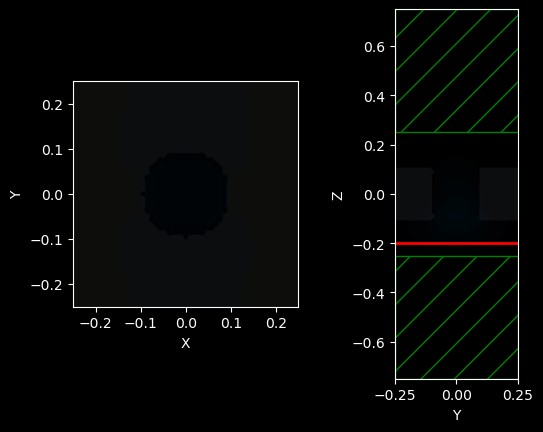

In [17]:
#%%capture 
# to suppress output of this cell
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np  # Assuming np is used in your post_process

# Sim duration and number of snapshots
sim_time = 15 # 
n_frames = 601

# Simulation object
sim.reset_meep()  # Reset the simulation

sim = mp.Simulation(
    cell_size=cell_size,
    resolution=resolution,
    boundary_layers=boundary_layers,
    sources=sources,
    k_point=mp.Vector3(0, 0, 0),
    geometry=geometry  # Include the film and hole
)


# Plot
fig, (ax1, ax2) = plt.subplots(1, 2)  # Create two subplots side by side


def simulate(k):    
    # Time delta (in fs) between snapshots. Note that
    # we subtract 1 because we include the initial state
    # as the first frame.
    delta_time = sim_time / (n_frames - 1)
    elapsed = k * delta_time
    
    # Clear previous plots
    ax1.clear()
    ax2.clear()
    
    # Plot on the existing axes
    sim.plot2D(ax=ax1, output_plane=output_plane_xy, fields=mp.Ex, 
               eps_parameters={'cmap':'Greys','vmin':-5.5, 'alpha': 0.25},
               field_parameters={'cmap': cmap_br, 'post_process': np.real,'vmin':-1,'vmax':1})
    sim.plot2D(ax=ax2, output_plane=output_plane_yz, fields=mp.Ex, 
               eps_parameters={'cmap':'Greys','vmin':-5.5, 'alpha': 0.25},
               field_parameters={'cmap': cmap_br, 'post_process': np.real,'vmin':-1,'vmax':1})
    
    # Run until the next frame time
    sim.run(until=delta_time)

# Create the animation
anim = animation.FuncAnimation(fig, simulate, frames=n_frames)

# Save the animation
video_file = 'trans_ag_film.mp4'
anim.save(video_file, fps=10, extra_args=['-vcodec', 'libx264'],
          progress_callback=lambda i, n: print(i))

plt.show()
plt.close(fig)  # Close the figure to free memory

In [18]:
from IPython.display import Video  # For displaying the video

display(Video(video_file, embed=True))

## Make ALL a Python Script
To make the processes more automatic, we can write a Python module that defines the function
to compute the transmittance as a function of the geometrical parameters of the hole. The file `Trans_Ag_film.py` defines a function that returns the transmittance with the inputs $l_1$ and $l_2$, which are the side lengths of the rectangle of the hole.    

There are two methods to use `Trans_Ag_film.py`:
 - Run the code in the shell by
   ``` shell
   pyhton  Trans_Ag_film.py 0.1 0.2
   ```
   where $l_1=0.2$ and $l_2=0.2$. This code takes about 200 seconds to run.
 - Use `Trans_Ag_film.py` as a module in another Python code.
   ```python
   from Trans_Ag_film import sim_eot
   ```

Now, we can write a Python program to do the optimization. The pseudocode is 

1. Import sim_eot for calculating transmission as a function of $l_1$ and $l_2$
2. Define the function $f(l_1,l_2)$ to be minimized with the inputs $l_1$ and $l_2$
3. Use the optimization algorithm to find the best $[l_1,l_2]$

What are the considerations for this problem? 
 - Each function evaluation takes 200 seconds. This is relatively long.
 - No derivatives of the function $f(l_1,l_2)$

I provide the example code `opt_eot.py` using the Nelder-Mead algorithm.
In the code, I set the parameters
``` python
# Set Optimization Options
options = {
    'disp': True,           # Print convergence messages
    'xatol': 1e-6,          # Absolute error in xopt between iterations
    'fatol': 1e-6,          # Absolute error in func(xopt) between iterations
    'adaptive': True,       # Use adaptive parameters
    'maxfev': 100,
    'initial_simplex': initial_simplex
}
```
This means that the maximum number of function evaluations is `maxfev = 100`. What about the time to run `opt_eot.py`? $200 \times 100 = 20,000$ seconds (5.5 hours)! In this case, you'd better run the code in the background using `nohup` command
```
nohup python opt_eot.py > opt_eot.out &
```

After that, you can go on a date and then return to see the results. Maybe one more thing before the date is to check that the code is running by `top` and `opt_eot.out

## Save Results
As you run any simulation, it is a must to save the results. Read `opt_eot.py` to see how to save the results.
``` python
# Print results
print("\nOptimization Results:")
print("Best parameters (l_i):")
for i, d in enumerate(best_params):
    print(f"l_{i+1} = {d:.2e}")
print(f"Minimum value of f: {best_value:.2e}")

# Save history to a text file
with open('optimization_history.txt', 'w') as f:
    f.write("Iteration\tl1\tl2\tfom\n")
    for i, (l1, l2, fval) in enumerate(history):
        f.write(f"{i}\t{l1:.6e}\t{l2:.6e}\t{fval:.6e}\n")

print("\nHistory saved to 'optimization_history.txt'")
```
 


## Mini Project of EOT
To find the best shape of the hole such that the transmission is large and the areas of the holes are small. I define the function to be minimized to be 
$$f = - T(\lambda = 600 \textrm{ nm})\times\left(1 - \frac{A_h}{A}\right)^4,$$
where $A$ is the area of the film ($500\times500$ nm$^2$), and $A_h$ is the area of the hole.
For example, you can use an elliptical hole with the parameters: the position of the center, the lengths of the short and long axes, and the angle of the ellipse. Then, you can write your own $f(x,y,a,b,\theta)$ and find the best $[x,y,a,b,\theta]$ with a proper optimization algorithm. You can try other shapes, and also maybe more than one hole. At the end, each group shall turn in the best geometry of the holes by providing their parameters of the holes. 
